# Analysis of Chronic Disease Distribution in US States

## Introduction

The aim of this project is to analyze the distribution of chronic diseases across different states in the United States over a certain period. By examining data from various sources, we aim to understand the prevalence and distribution of chronic diseases and how they impact different demographic groups within each state. Additionally, we will explore the stratification process used to group patients based on various demographic factors such as gender, race/ethnicity, and age.

### Dataset Overview
The dataset contains the following columns:

- **YearStart**: Starting year of the data collection period
- **YearEnd**: Ending year of the data collection period
- **LocationAbbr**: Abbreviation for the location (state)
- **LocationDesc**: Full name of the location (state)
- **DataSource**: Source of the data
- **Topic**: Topic of the chronic disease
- **Question**: Specific question related to the chronic disease
- **DataValueType**: Type of data value (e.g., number, percentage)
- **StratificationCategory1**: First category for stratification
- **Stratification1**: First stratification within the category
- **LocationID**: Unique identifier for the location
- **TopicID**: Unique identifier for the topic
- **QuestionID**: Unique identifier for the question
- **DataValueTypeID**: Unique identifier for the data value type
- **StratificationCategoryID1**: Unique identifier for the first stratification category
- **StratificationID1**: Unique identifier for the first stratification

## Objectives
1. Explore the distribution of chronic diseases across different states in the US.
2. Investigate the stratification process used to group patients based on demographic factors.
3. Analyze how each state is affected by different chronic diseases or topics.
4. Assess the usefulness of this analysis in informing research studies related to chronic diseases and public health interventions.


In [1]:
#import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the data
chron_data = pd.read_csv("Desktop/DataSets/U.S._Chronic_Disease_Indicators__CDI_.csv", low_memory = False)

In [3]:
# Display the first few rows of the dataset
chron_data.head()

YearStart  YearEnd LocationAbbr          LocationDesc DataSource   Topic   
0       2014     2014           AR              Arkansas  SEDD; SID  Asthma  \
1       2018     2018           CO              Colorado  SEDD; SID  Asthma   
2       2018     2018           DC  District of Columbia  SEDD; SID  Asthma   
3       2017     2017           GA               Georgia  SEDD; SID  Asthma   
4       2010     2010           MI              Michigan  SEDD; SID  Asthma   

                      Question  Response DataValueUnit DataValueType  ...   
0  Hospitalizations for asthma       NaN           NaN        Number  ...  \
1  Hospitalizations for asthma       NaN           NaN        Number  ...   
2  Hospitalizations for asthma       NaN           NaN        Number  ...   
3  Hospitalizations for asthma       NaN           NaN        Number  ...   
4  Hospitalizations for asthma       NaN           NaN        Number  ...   

  LocationID  TopicID QuestionID DataValueTypeID  StratificationCategoryID1   
0          5      AST     AST3_1            NMBR                     GENDER  \
1          8      AST     AST3_1            NMBR                    OVERALL   
2         11      AST     AST3_1            NMBR                    OVERALL   
3         13      AST     AST3_1            NMBR                     GENDER   
4         26      AST     AST3_1            NMBR                       RACE   

   StratificationID1 StratificationCategoryID2 StratificationID2   
0               GENM                       NaN               NaN  \
1                OVR                       NaN               NaN   
2                OVR                       NaN               NaN   
3               GENF                       NaN               NaN   
4                HIS                       NaN               NaN   

   StratificationCategoryID3  StratificationID3  
0                        NaN                NaN  
1                        NaN                NaN  
2                        NaN                NaN  
3                        NaN                NaN  
4                        NaN                NaN  

[5 rows x 34 columns]

In [4]:
# Get information about the dataset
print(chron_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185676 entries, 0 to 1185675
Data columns (total 34 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   YearStart                  1185676 non-null  int64  
 1   YearEnd                    1185676 non-null  int64  
 2   LocationAbbr               1185676 non-null  object 
 3   LocationDesc               1185676 non-null  object 
 4   DataSource                 1185676 non-null  object 
 5   Topic                      1185676 non-null  object 
 6   Question                   1185676 non-null  object 
 7   Response                   0 non-null        float64
 8   DataValueUnit              1033553 non-null  object 
 9   DataValueType              1185676 non-null  object 
 10  DataValue                  806942 non-null   object 
 11  DataValueAlt               804578 non-null   float64
 12  DataValueFootnoteSymbol    393710 non-null   object 
 13  DatavalueFoo

In [5]:
# Summary statistics of numeric columns
chron_data.describe()


YearStart       YearEnd  Response  DataValueAlt  LowConfidenceLimit   
count  1.185676e+06  1.185676e+06       0.0  8.045780e+05       682380.000000  \
mean   2.015103e+03  2.015643e+03       NaN  1.005325e+03           50.264623   
std    3.320259e+00  3.001197e+00       NaN  1.880433e+04           89.004848   
min    2.001000e+03  2.001000e+03       NaN  0.000000e+00            0.000000   
25%    2.013000e+03  2.013000e+03       NaN  1.610000e+01           11.000000   
50%    2.015000e+03  2.016000e+03       NaN  4.000000e+01           28.500000   
75%    2.018000e+03  2.018000e+03       NaN  7.600000e+01           56.300000   
max    2.021000e+03  2.021000e+03       NaN  2.925456e+06         2541.600000   

       HighConfidenceLimit  StratificationCategory2  Stratification2   
count        682380.000000                      0.0              0.0  \
mean             61.873881                      NaN              NaN   
std             100.104303                      NaN              NaN   
min               0.000000                      NaN              NaN   
25%              16.300000                      NaN              NaN   
50%              41.000000                      NaN              NaN   
75%              71.100000                      NaN              NaN   
max            3530.500000                      NaN              NaN   

       StratificationCategory3  Stratification3  ResponseID    LocationID   
count                      0.0              0.0         0.0  1.185676e+06  \
mean                       NaN              NaN         NaN  3.078907e+01   
std                        NaN              NaN         NaN  1.750972e+01   
min                        NaN              NaN         NaN  1.000000e+00   
25%                        NaN              NaN         NaN  1.700000e+01   
50%                        NaN              NaN         NaN  3.000000e+01   
75%                        NaN              NaN         NaN  4.500000e+01   
max                        NaN              NaN         NaN  7.800000e+01   

       StratificationCategoryID2  StratificationID2   
count                        0.0                0.0  \
mean                         NaN                NaN   
std                          NaN                NaN   
min                          NaN                NaN   
25%                          NaN                NaN   
50%                          NaN                NaN   
75%                          NaN                NaN   
max                          NaN                NaN   

       StratificationCategoryID3  StratificationID3  
count                        0.0                0.0  
mean                         NaN                NaN  
std                          NaN                NaN  
min                          NaN                NaN  
25%                          NaN                NaN  
50%                          NaN                NaN  
75%                          NaN                NaN  
max                          NaN                NaN

In [6]:
chron_data.shape

(1185676, 34)

In [7]:
# Check for missing values
print(chron_data.isnull().sum())

YearStart                          0
YearEnd                            0
LocationAbbr                       0
LocationDesc                       0
DataSource                         0
Topic                              0
Question                           0
Response                     1185676
DataValueUnit                 152123
DataValueType                      0
DataValue                     378734
DataValueAlt                  381098
DataValueFootnoteSymbol       791966
DatavalueFootnote             791966
LowConfidenceLimit            503296
HighConfidenceLimit           503296
StratificationCategory1            0
Stratification1                    0
StratificationCategory2      1185676
Stratification2              1185676
StratificationCategory3      1185676
Stratification3              1185676
GeoLocation                    10166
ResponseID                   1185676
LocationID                         0
TopicID                            0
QuestionID                         0
D

In [8]:
# Drop columns with null values
data = chron_data.dropna(axis=1)

# Print the cleaned DataFrame
data


YearStart  YearEnd LocationAbbr          LocationDesc DataSource   
0             2014     2014           AR              Arkansas  SEDD; SID  \
1             2018     2018           CO              Colorado  SEDD; SID   
2             2018     2018           DC  District of Columbia  SEDD; SID   
3             2017     2017           GA               Georgia  SEDD; SID   
4             2010     2010           MI              Michigan  SEDD; SID   
...            ...      ...          ...                   ...        ...   
1185671       2020     2020           WY               Wyoming      BRFSS   
1185672       2020     2020           WY               Wyoming      BRFSS   
1185673       2017     2017           IA                  Iowa      BRFSS   
1185674       2020     2020           WY               Wyoming      BRFSS   
1185675       2019     2019           RI          Rhode Island      BRFSS   

                Topic                                           Question   
0              Asthma                        Hospitalizations for asthma  \
1              Asthma                        Hospitalizations for asthma   
2              Asthma                        Hospitalizations for asthma   
3              Asthma                        Hospitalizations for asthma   
4              Asthma                        Hospitalizations for asthma   
...               ...                                                ...   
1185671      Diabetes  Dilated eye examination among adults aged >= 1...   
1185672  Older Adults  Proportion of older adults aged >= 65 years wh...   
1185673     Arthritis  Activity limitation due to arthritis among adu...   
1185674      Diabetes   Diabetes prevalence among women aged 18-44 years   
1185675     Arthritis  Activity limitation due to arthritis among adu...   

                   DataValueType StratificationCategory1      Stratification1   
0                         Number                  Gender                 Male  \
1                         Number                 Overall              Overall   
2                         Number                 Overall              Overall   
3                         Number                  Gender               Female   
4                         Number          Race/Ethnicity             Hispanic   
...                          ...                     ...                  ...   
1185671  Age-adjusted Prevalence          Race/Ethnicity  White, non-Hispanic   
1185672         Crude Prevalence          Race/Ethnicity  White, non-Hispanic   
1185673  Age-adjusted Prevalence          Race/Ethnicity             Hispanic   
1185674         Crude Prevalence          Race/Ethnicity             Hispanic   
1185675         Crude Prevalence                 Overall              Overall   

         LocationID TopicID QuestionID DataValueTypeID   
0                 5     AST     AST3_1            NMBR  \
1                 8     AST     AST3_1            NMBR   
2                11     AST     AST3_1            NMBR   
3                13     AST     AST3_1            NMBR   
4                26     AST     AST3_1            NMBR   
...             ...     ...        ...             ...   
1185671          56     DIA     DIA7_0      AGEADJPREV   
1185672          56     OLD     OLD3_1         CRDPREV   
1185673          19     ART     ART2_1      AGEADJPREV   
1185674          56     DIA     DIA2_2         CRDPREV   
1185675          44     ART     ART2_1         CRDPREV   

        StratificationCategoryID1 StratificationID1  
0                          GENDER              GENM  
1                         OVERALL               OVR  
2                         OVERALL               OVR  
3                          GENDER              GENF  
4                            RACE               HIS  
...                           ...               ...  
1185671                      RACE               WHT  
1185672                      RACE               WHT  
1185673        

## Data Visualisation

### Topics

In [9]:
# Count occurrences of each topic
topic_counts = data['Topic'].value_counts()

print(topic_counts)


Topic
Cancer                                             176339
Cardiovascular Disease                             157750
Diabetes                                           156808
Chronic Obstructive Pulmonary Disease              152874
Asthma                                              80342
Arthritis                                           78300
Nutrition, Physical Activity, and Weight Status     75418
Overarching Conditions                              73260
Alcohol                                             66091
Tobacco                                             59396
Older Adults                                        26316
Chronic Kidney Disease                              24731
Oral Health                                         22273
Mental Health                                       13200
Immunization                                         9570
Reproductive Health                                  9086
Disability                                           3922
Name: co

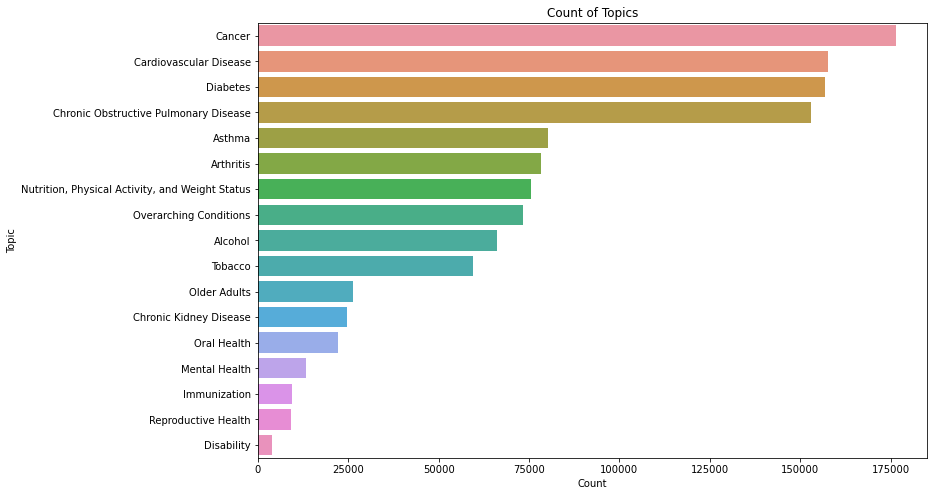

In [10]:
# Plot count of topics
plt.figure(figsize=(12, 8))
sns.barplot(x=topic_counts.values, y=topic_counts.index)
plt.title('Count of Topics')
plt.xlabel('Count')
plt.ylabel('Topic')
plt.show()


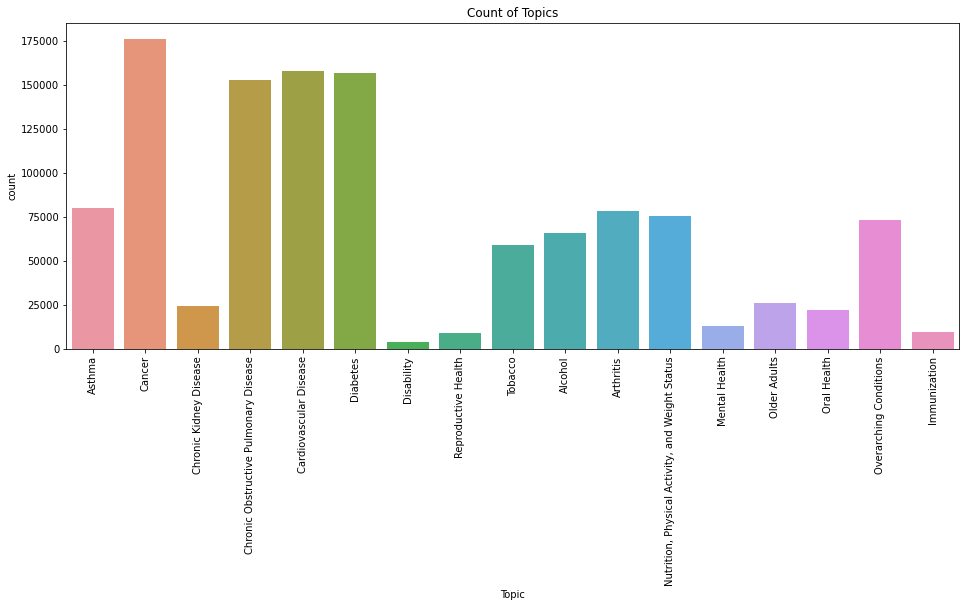

In [11]:
# Data visualization
# Let's plot some basic visualizations to understand the data better

# Countplot of 'Topic'
plt.figure(figsize=(16, 6))
sns.countplot(x='Topic', data=data)
plt.title('Count of Topics')
plt.xticks(rotation=90)
plt.show()


Cancer is the leading  chronic disease topic in the research while diability comes as the last topic on the research

In [12]:
# Create a pivot table to count occurrences of each topic in each state
topic_state_counts = data.pivot_table(index='Topic', columns='LocationDesc', aggfunc='size', fill_value=0)

# Print the DataFrame
topic_state_counts


LocationDesc                                     Alabama  Alaska  Arizona   
Topic                                                                       
Alcohol                                             1232    1253     1197  \
Arthritis                                           1440    1440     1440   
Asthma                                              1474    1474     1531   
Cancer                                              3378    3378     3378   
Cardiovascular Disease                              2961    2958     3045   
Chronic Kidney Disease                               472     472      472   
Chronic Obstructive Pulmonary Disease               2808    2808     2976   
Diabetes                                            2880    2877     2964   
Disability                                            74      74       74   
Immunization                                         176     176      176   
Mental Health                                        243     243      243   
Nutrition, Physical Activity, and Weight Status     1385    1385     1381   
Older Adults                                         496     496      496   
Oral Health                                          410     431      375   
Overarching Conditions                              1367    1367     1367   
Reproductive Health                                  169     211       99   
Tobacco                                             1093    1114     1057   

LocationDesc                                     Arkansas  California   
Topic                                                                   
Alcohol                                              1239        1190  \
Arthritis                                            1440        1440   
Asthma                                               1516        1495   
Cancer                                               3378        3378   
Cardiovascular Disease                               3042        3003   
Chronic Kidney Disease                                472         472   
Chronic Obstructive Pulmonary Disease                2892        2892   
Diabetes                                             2964        2922   
Disability                                             74          74   
Immunization                                          176         176   
Mental Health                                         243         243   
Nutrition, Physical Activity, and Weight Status      1385        1385   
Older Adults                                          496         496   
Oral Health                                           417         368   
Overarching Conditions                               1367        1367   
Reproductive Health                                   183          85   
Tobacco                                              1100        1051   

LocationDesc                                     Colorado  Connecticut   
Topic                                                                    
Alcohol                                              1246         1239  \
Arthritis                                            1440         1440   
Asthma                                               1516         1474   
Cancer                                               3378         3378   
Cardiovascular Disease                               3045         2955   
Chronic Kidney Disease                                472          472   
Chronic Obstructive Pulmonary Disease                2892         2808   
Diabetes                                             2964         2880   
Disability                                             74           74   
Immunization                                          176          176   
Mental Health                                         243          243   
Nutrition, Physical Activity, and Weight Status      1381         1381   
Older Adults                                          496          496   
Oral Health                           

In [13]:
print(topic_state_counts.shape)


(17, 55)


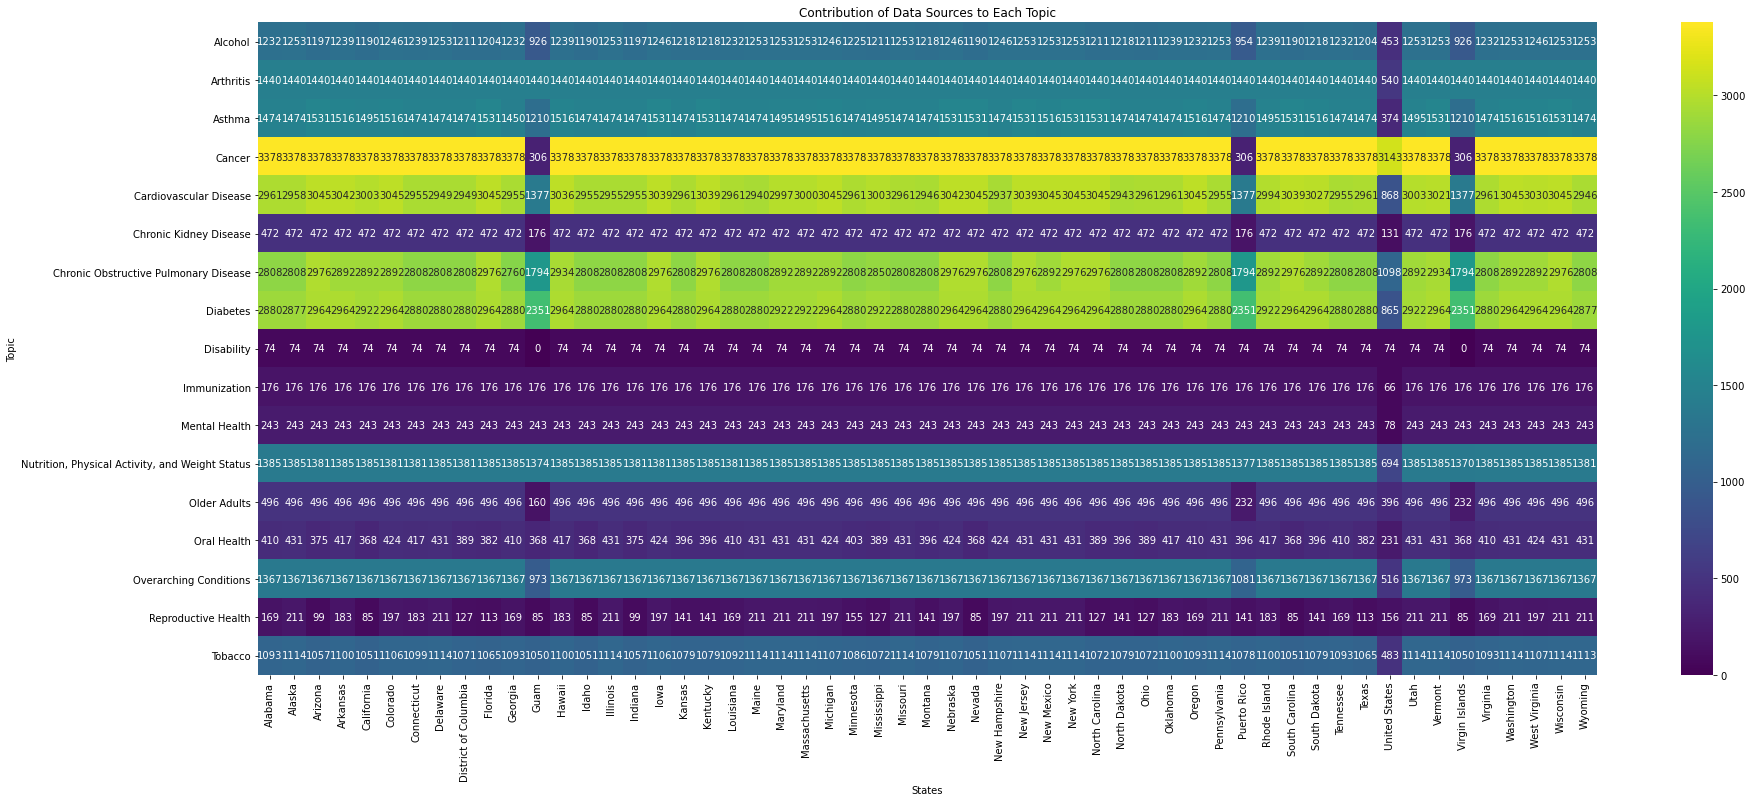

In [14]:
# Increase heatmap size and font size for better visualization
plt.figure(figsize=(30, 12))
sns.heatmap(topic_state_counts, cmap='viridis', annot=True, fmt='d', annot_kws={"size": 10})
plt.title('Contribution of Data Sources to Each Topic')
plt.xlabel('States')
plt.ylabel('Topic')
plt.xticks(rotation=90)
plt.show()


Checking the leading states with the highest count for each topic

In [15]:
# Group data by Topic and LocationDesc and count occurrences
topic_state = data.groupby(['Topic', 'LocationDesc']).size()

# Find the states with the highest count for each topic
max_state_per_topic = topic_state.groupby('Topic').idxmax()

# Create a table or print out the results
result_table = pd.DataFrame(max_state_per_topic, columns=['LocationDesc'])
result_table.reset_index(inplace=True)
result_table


Topic   
0                                           Alcohol  \
1                                         Arthritis   
2                                            Asthma   
3                                            Cancer   
4                            Cardiovascular Disease   
5                            Chronic Kidney Disease   
6             Chronic Obstructive Pulmonary Disease   
7                                          Diabetes   
8                                        Disability   
9                                      Immunization   
10                                    Mental Health   
11  Nutrition, Physical Activity, and Weight Status   
12                                     Older Adults   
13                                      Oral Health   
14                           Overarching Conditions   
15                              Reproductive Health   
16                                          Tobacco   

                                         LocationDesc  
0                                   (Alcohol, Alaska)  
1                                (Arthritis, Alabama)  
2                                   (Asthma, Arizona)  
3                                   (Cancer, Alabama)  
4                   (Cardiovascular Disease, Arizona)  
5                   (Chronic Kidney Disease, Alabama)  
6    (Chronic Obstructive Pulmonary Disease, Arizona)  
7                                 (Diabetes, Arizona)  
8                               (Disability, Alabama)  
9                             (Immunization, Alabama)  
10                           (Mental Health, Alabama)  
11  (Nutrition, Physical Activity, and Weight Stat...  
12                            (Older Adults, Alabama)  
13                              (Oral Health, Alaska)  
14                  (Overarching Conditions, Alabama)  
15                      (Reproductive Health, Alaska)  
16                                  (Tobacco, Alaska)

#### Plotting Topics to see their distribution among States

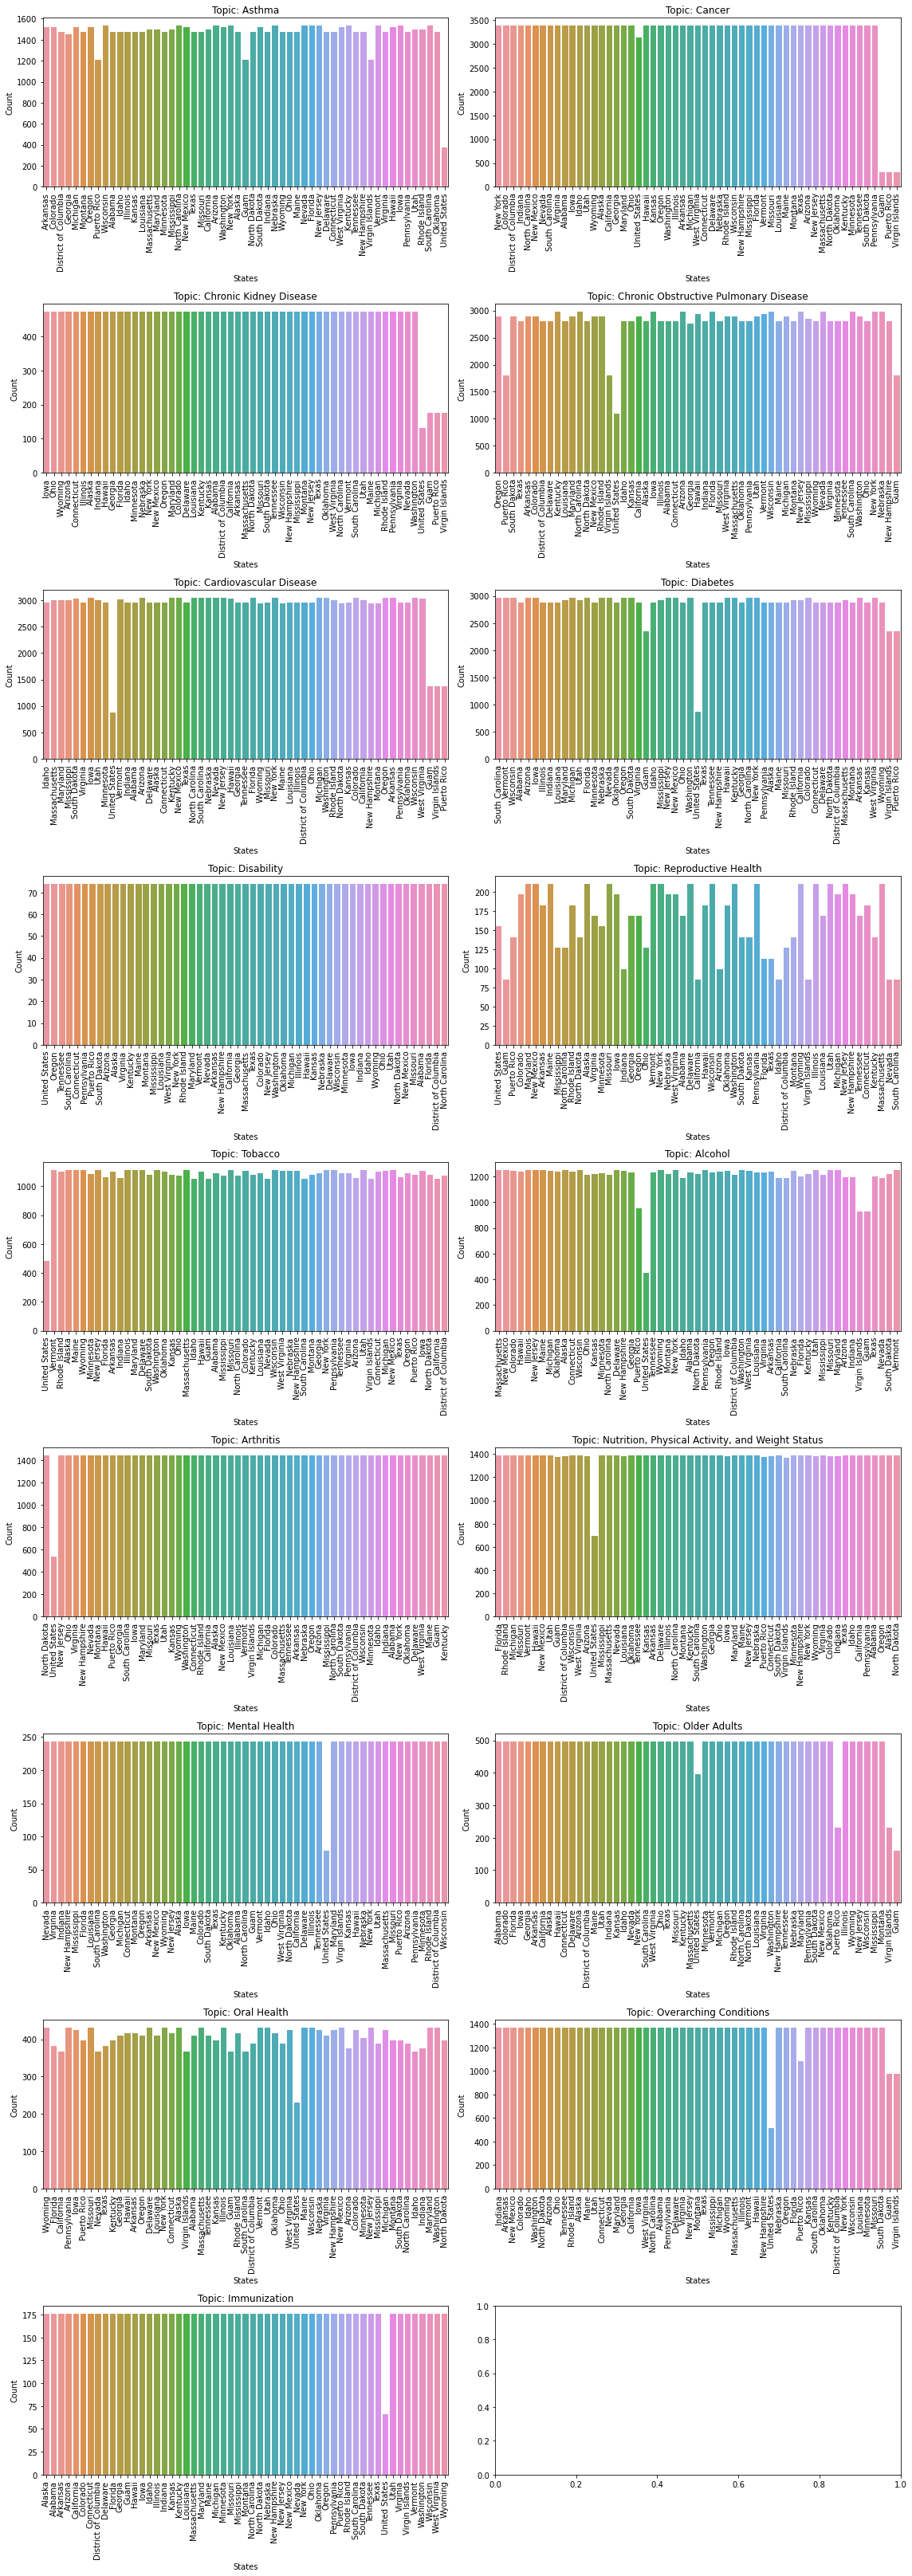

In [16]:
# Get unique topics
topics = data['Topic'].unique()

# Calculate the number of rows and columns for subplots
num_rows = len(topics) // 2 + (len(topics) % 2)
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 5 * num_rows))

# Flatten the axes if necessary
if num_rows > 1:
    axes = axes.flatten()

# Iterate over each topic and plot
for i, topic in enumerate(topics):
    ax = axes[i]
    sns.countplot(x='LocationDesc', data=data[data['Topic'] == topic], ax=ax)
    ax.set_title(f'Topic: {topic}')
    ax.set_xlabel('States')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=90)

# Adjust layout and show plots
plt.tight_layout()
plt.show()


### States

In [17]:
# Count occurrences of each state (LocationDesc)
state_counts = data['LocationDesc'].value_counts()
print(state_counts)



LocationDesc
Wisconsin               22556
New York                22556
New Jersey              22550
Nebraska                22518
Iowa                    22510
Vermont                 22490
New Mexico              22457
Washington              22457
Michigan                22422
Hawaii                  22420
Colorado                22417
West Virginia           22407
Arkansas                22384
Kentucky                22375
Oregon                  22352
Utah                    22352
Massachusetts           22349
Maryland                22346
North Carolina          22346
Florida                 22311
Rhode Island            22273
Arizona                 22271
South Dakota            22264
Nevada                  22241
South Carolina          22235
Missouri                22163
Alaska                  22157
Illinois                22157
Pennsylvania            22157
Delaware                22151
Maine                   22142
Wyoming                 22140
New Hampshire           221

#### Occurrences of each disease (Topic) in all States

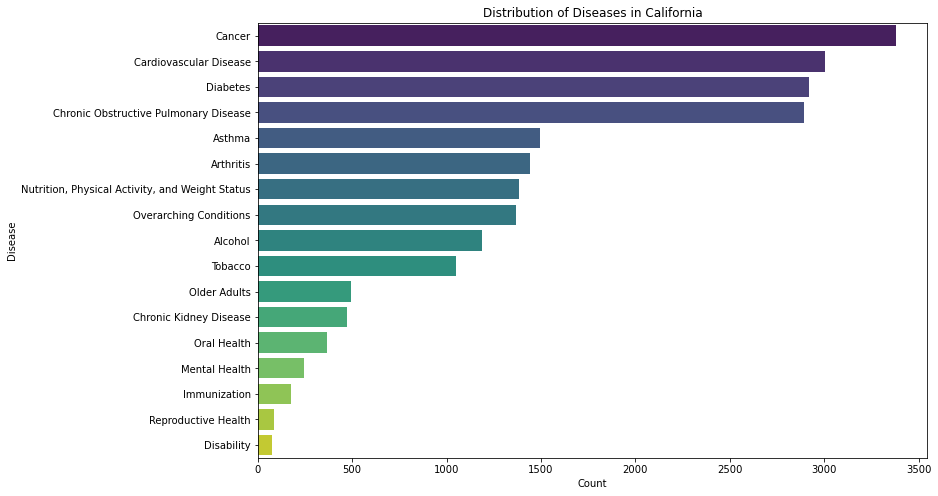

In [18]:
# Filter data for entries where LocationDesc is California
california_data = data[data['LocationDesc'] == 'California']

# Count occurrences of each disease (Topic) in California
disease_counts_california = california_data['Topic'].value_counts()

# Plot disease distribution in California
plt.figure(figsize=(12, 8))
sns.barplot(x=disease_counts_california.values, y=disease_counts_california.index, palette='viridis')
plt.title('Distribution of Diseases in California')
plt.xlabel('Count')
plt.ylabel('Disease')
plt.show()


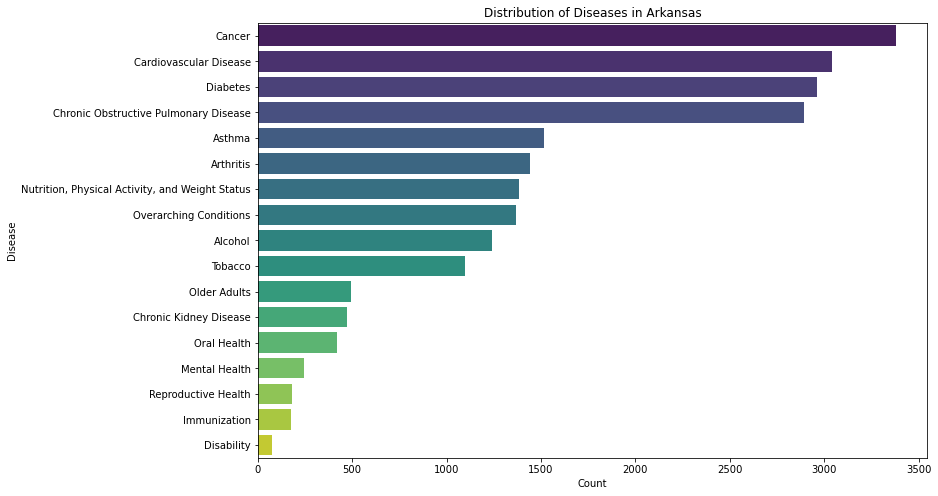

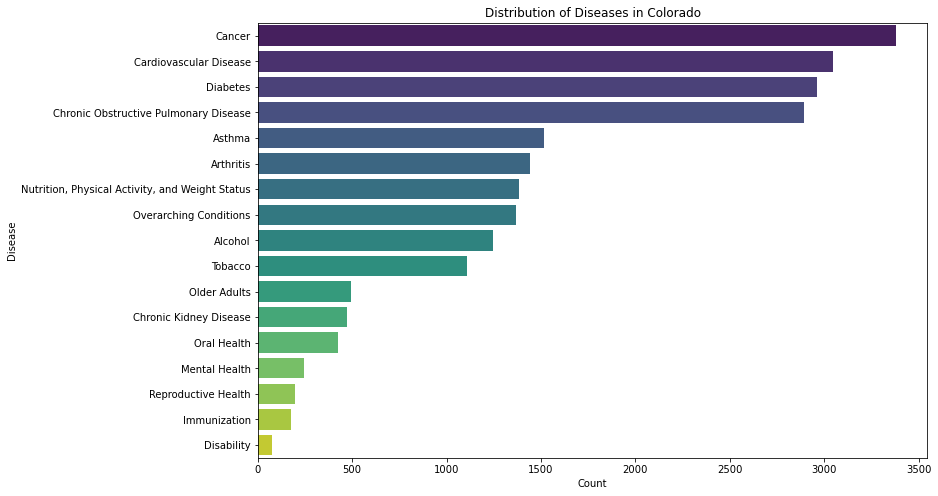

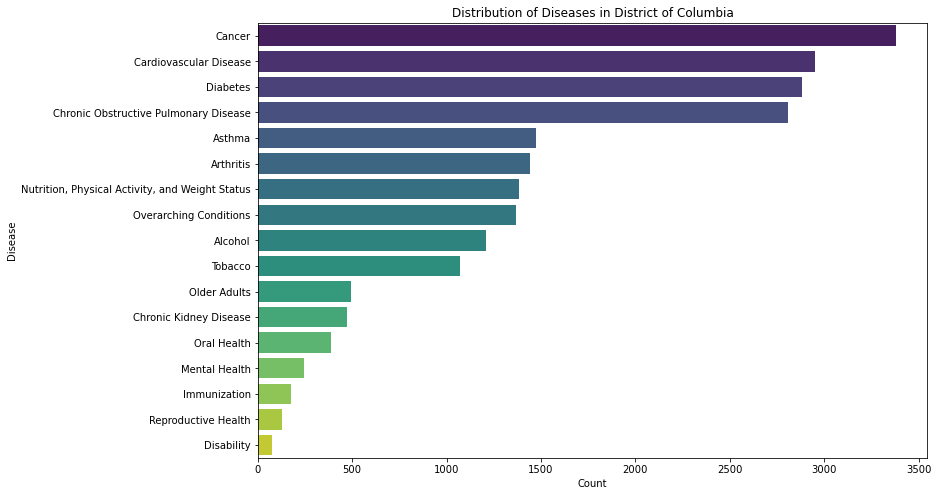

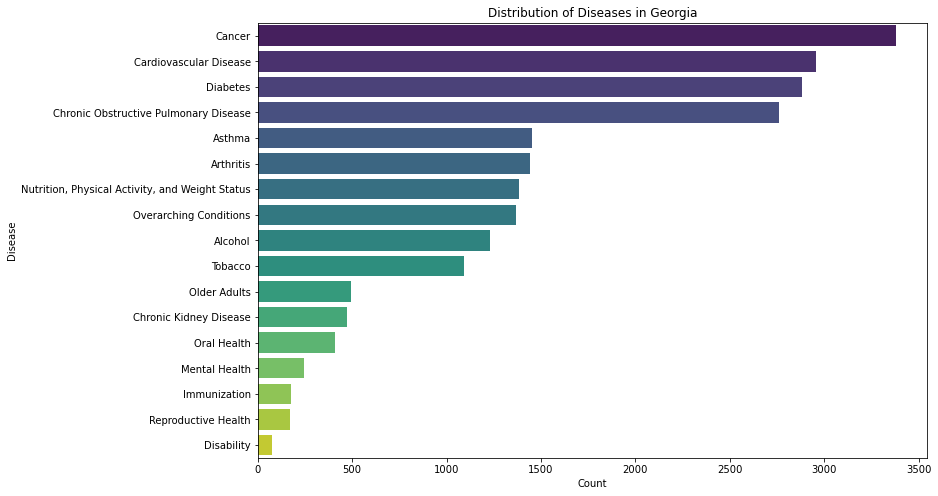

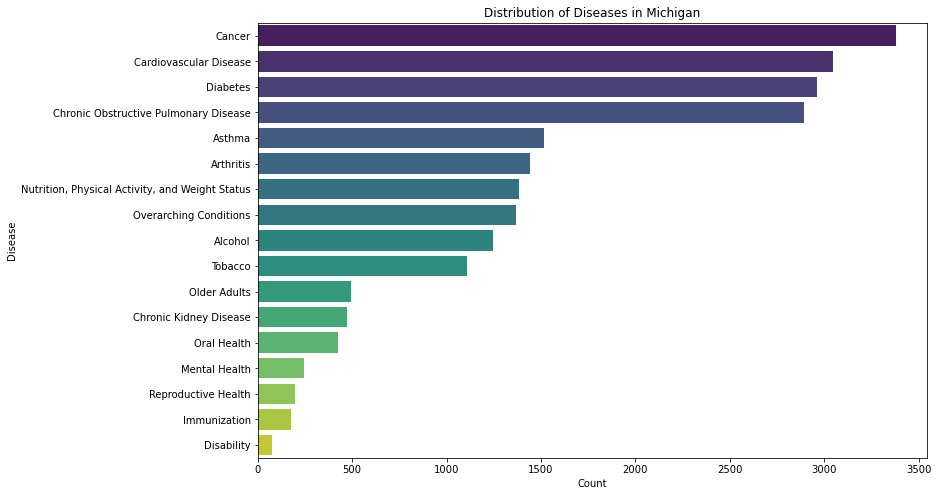

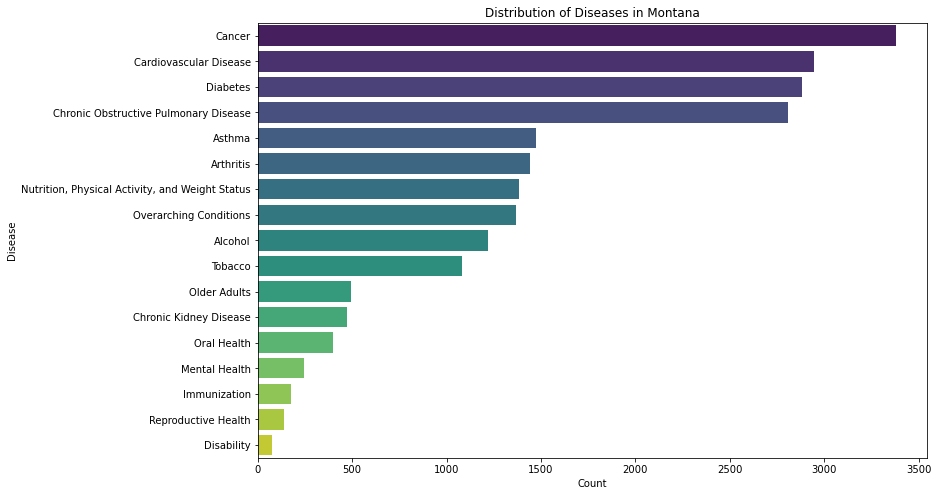

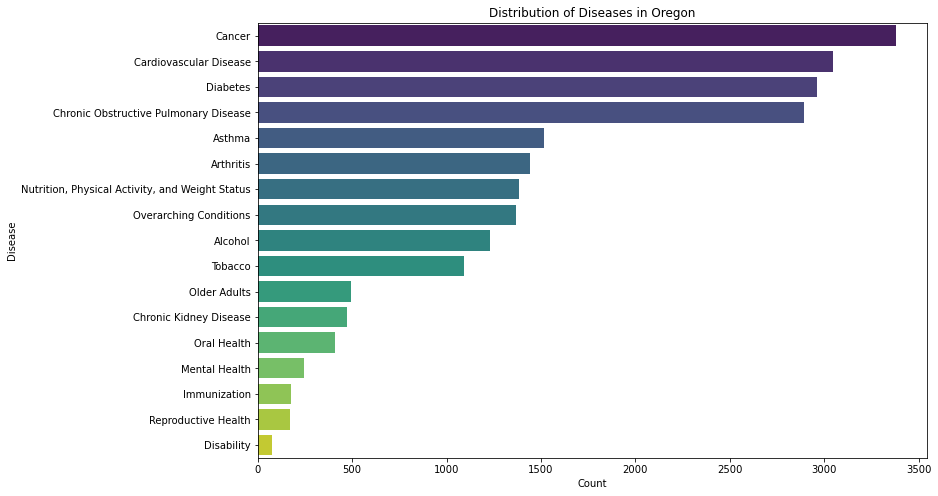

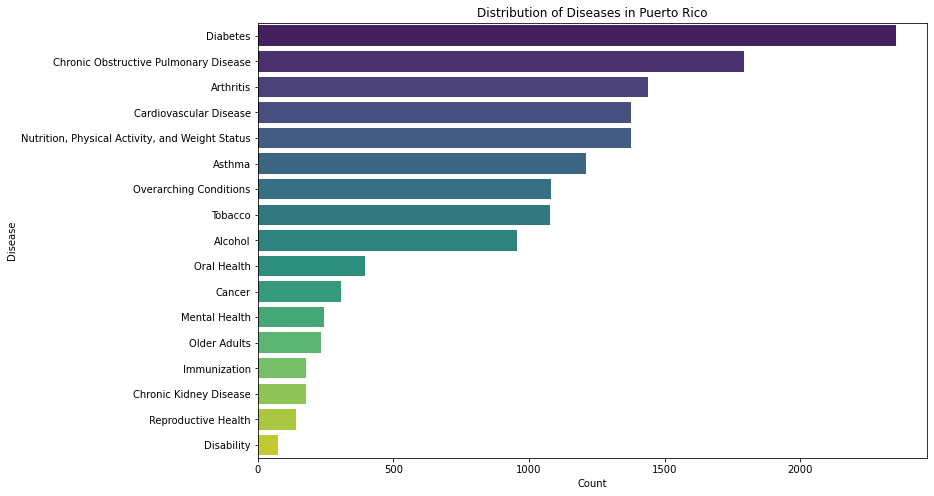

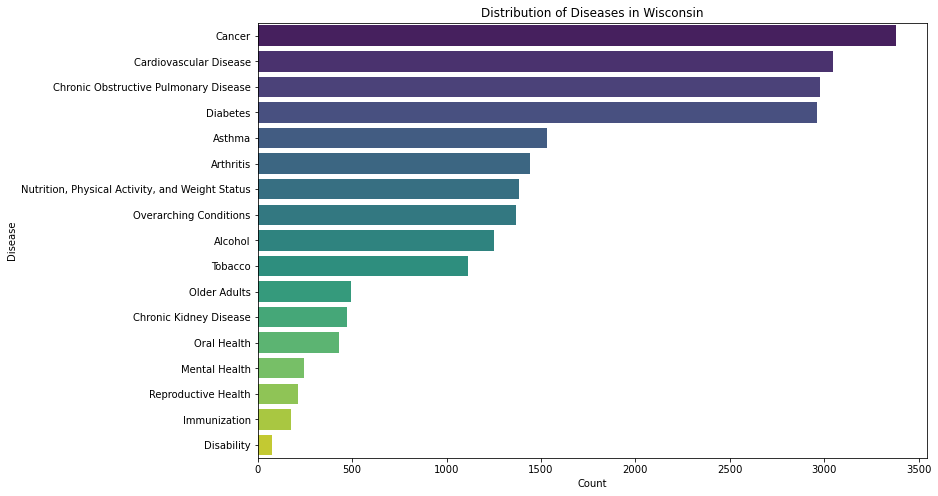

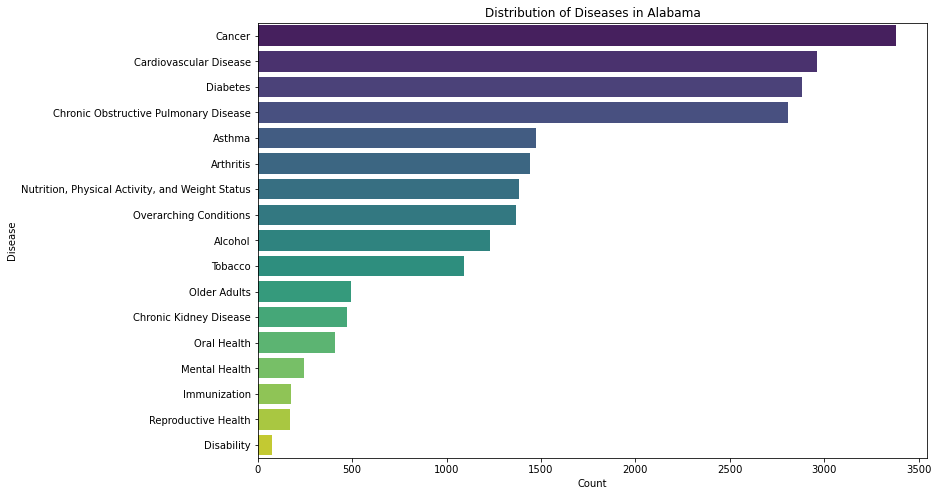

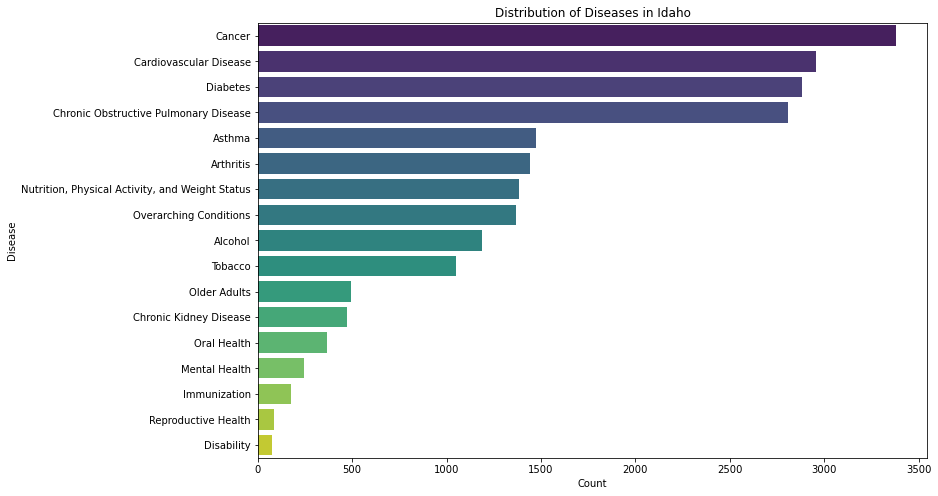

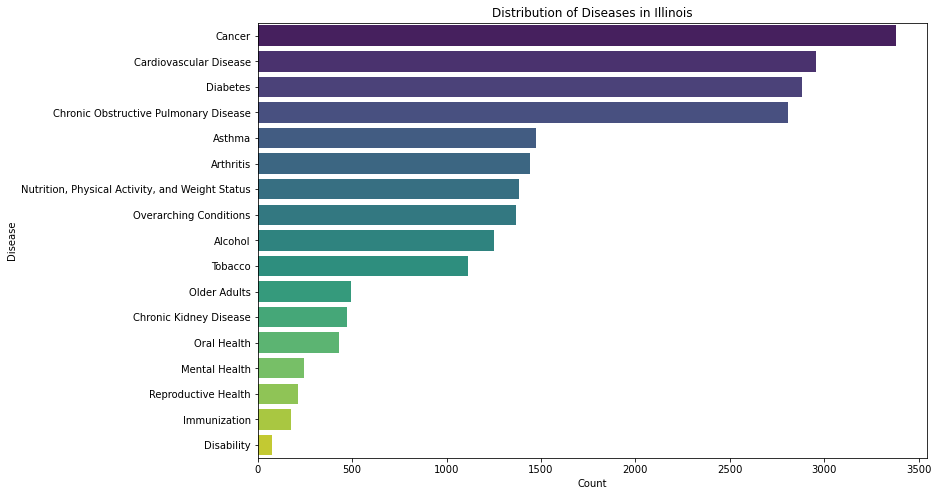

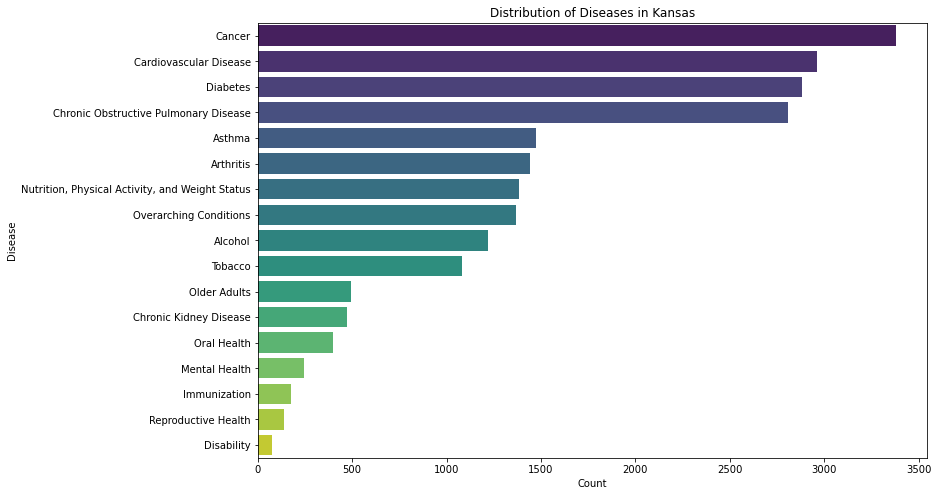

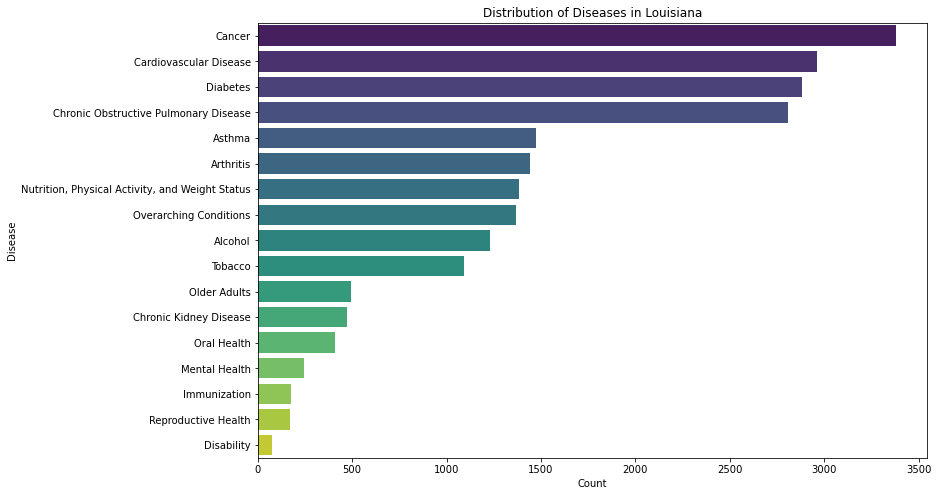

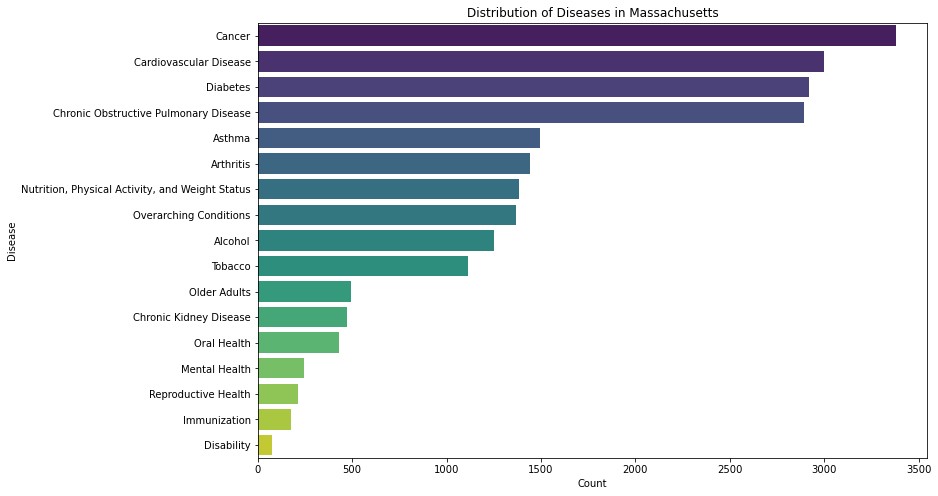

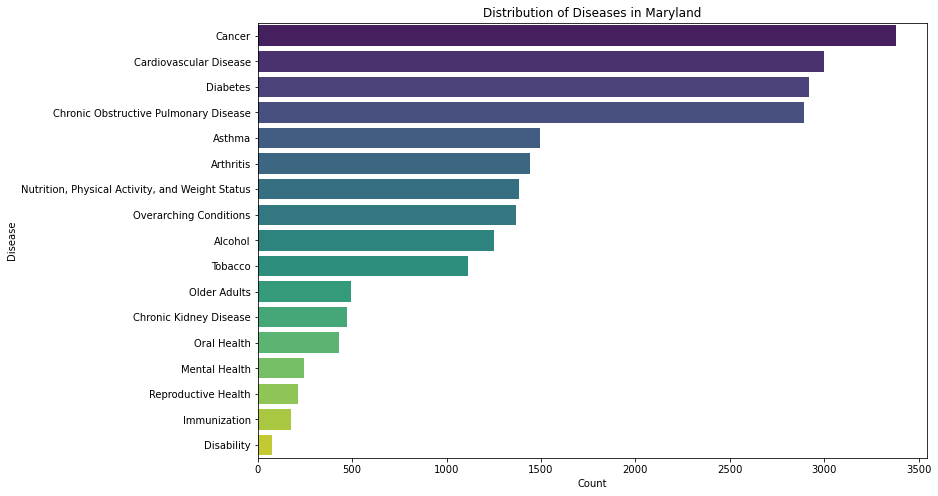

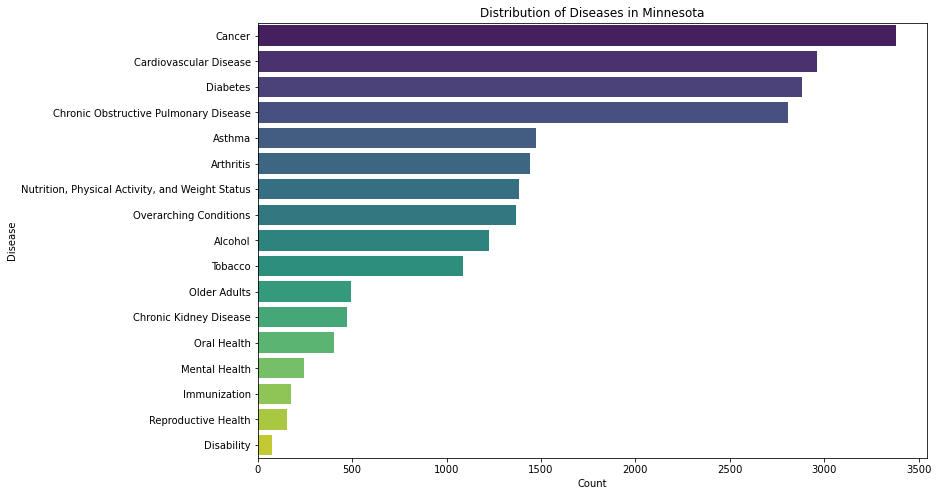

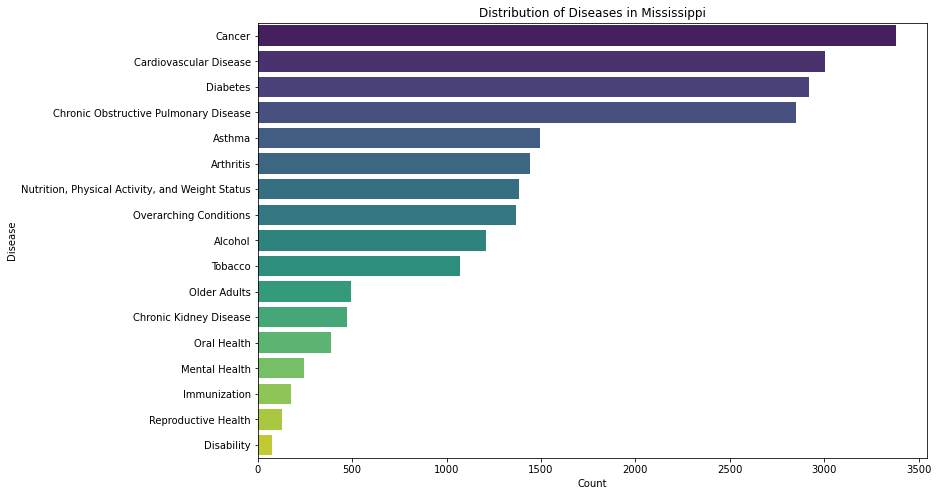

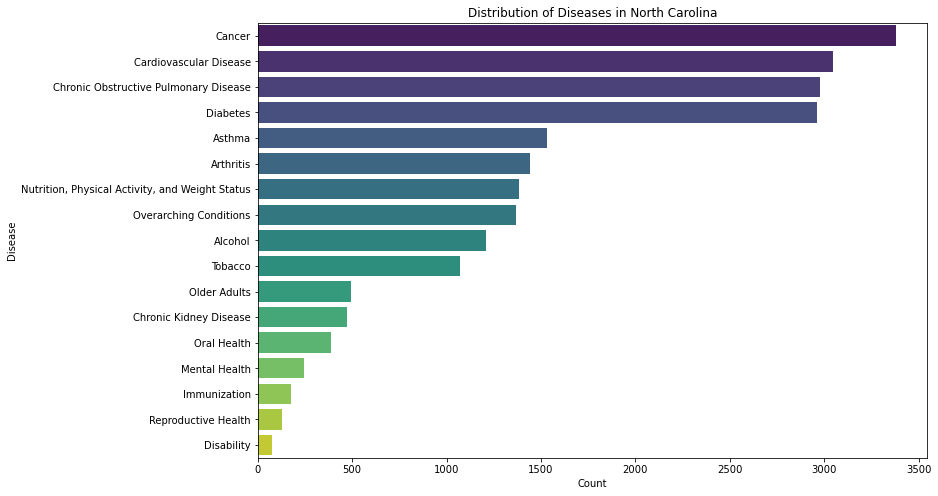

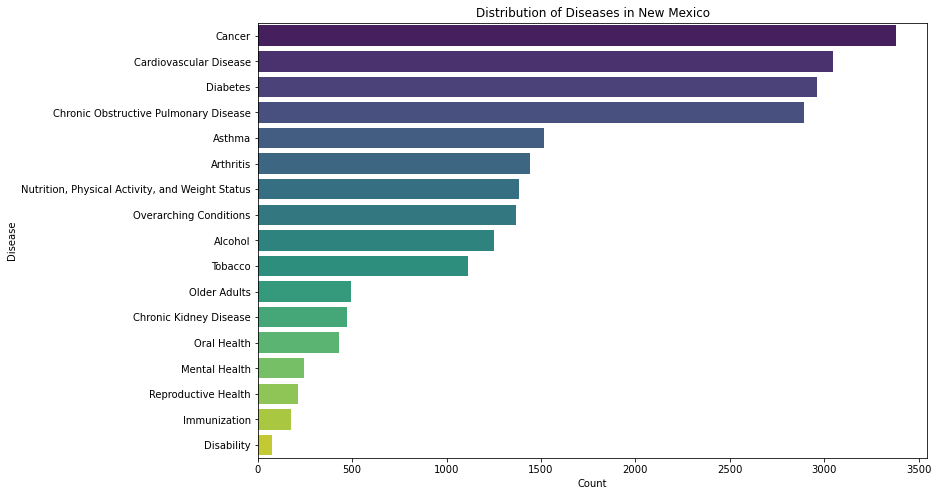

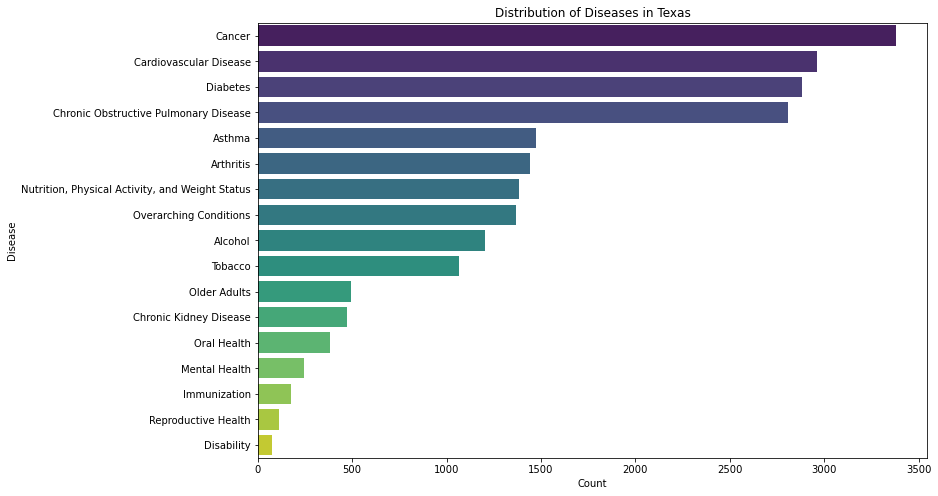

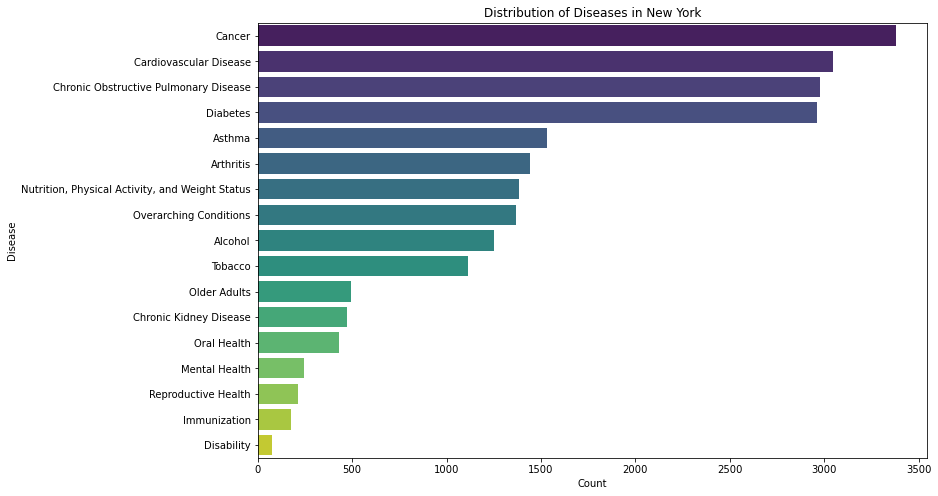

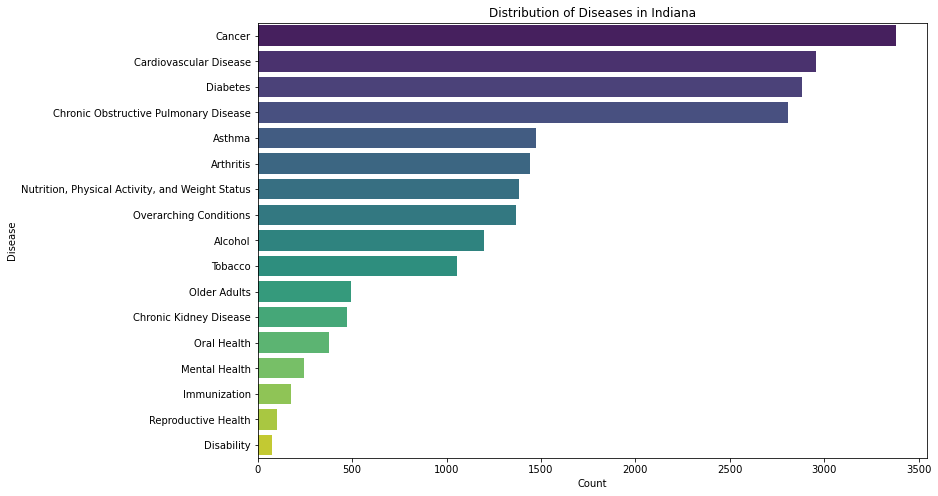

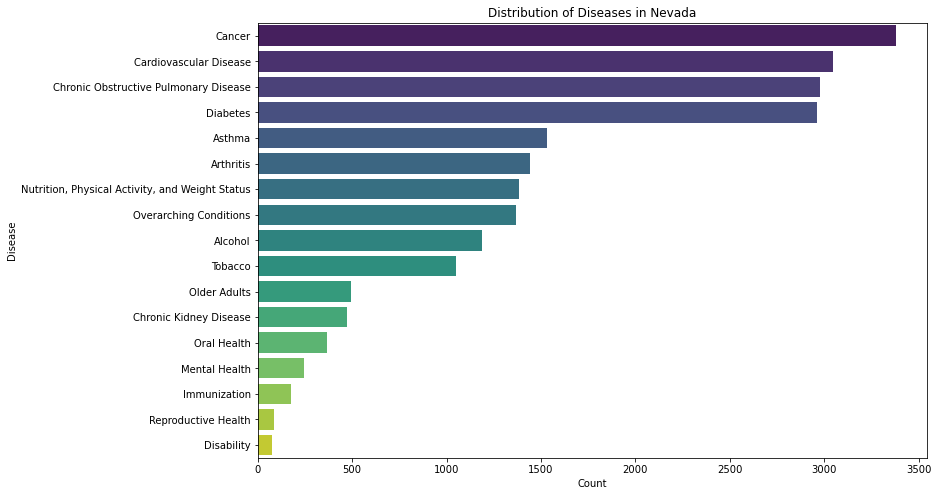

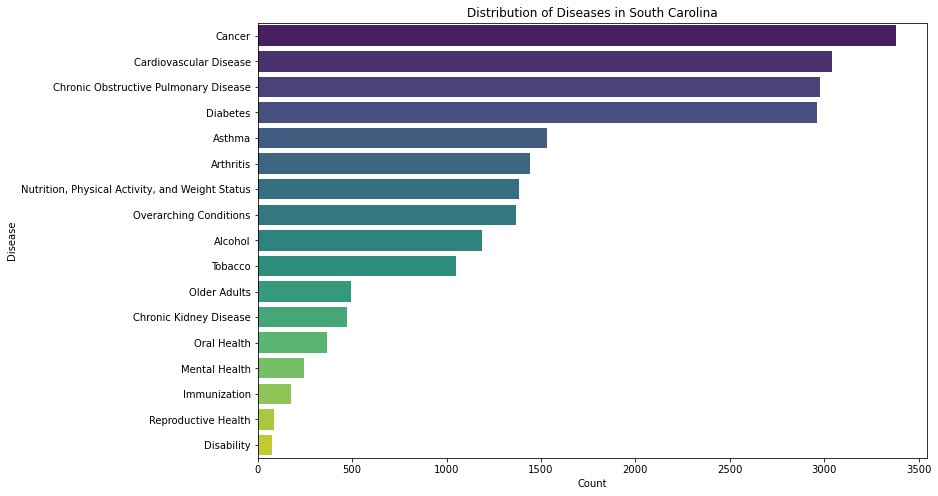

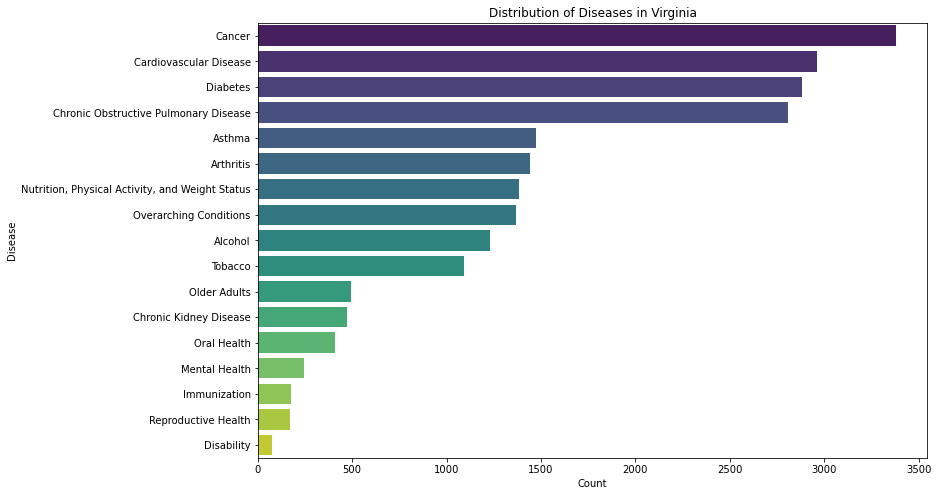

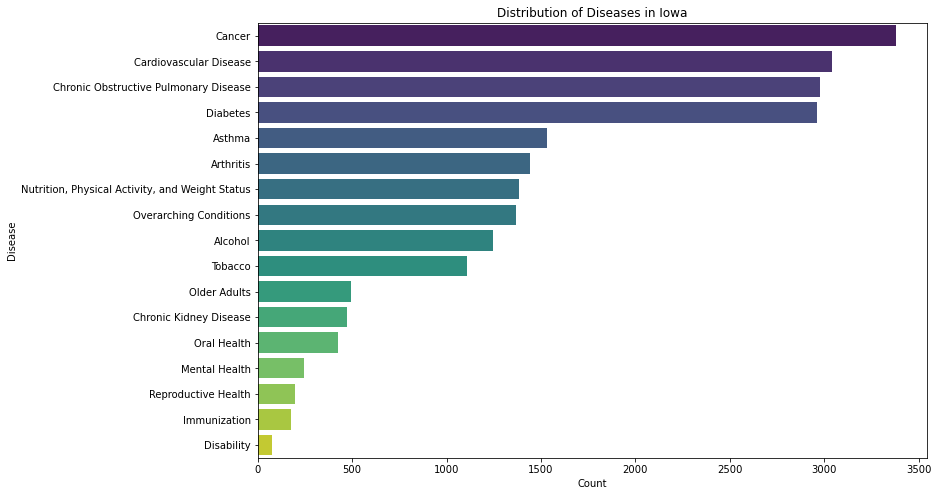

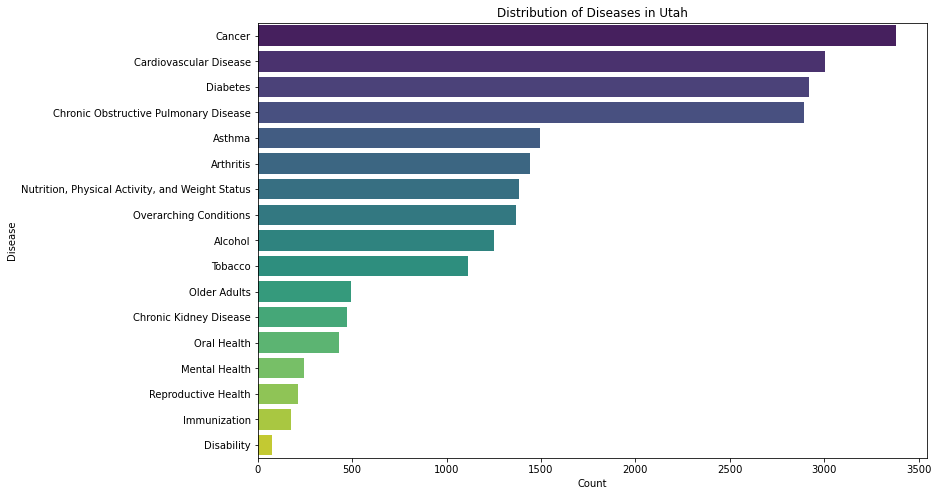

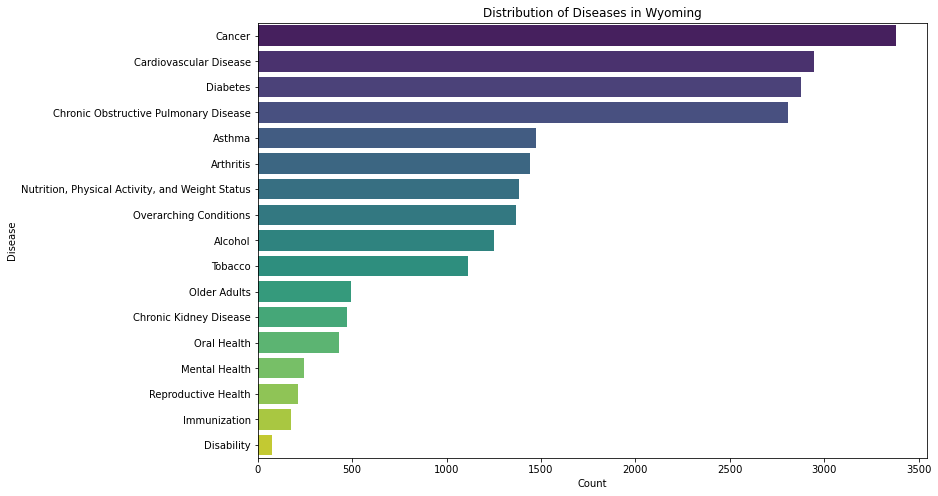

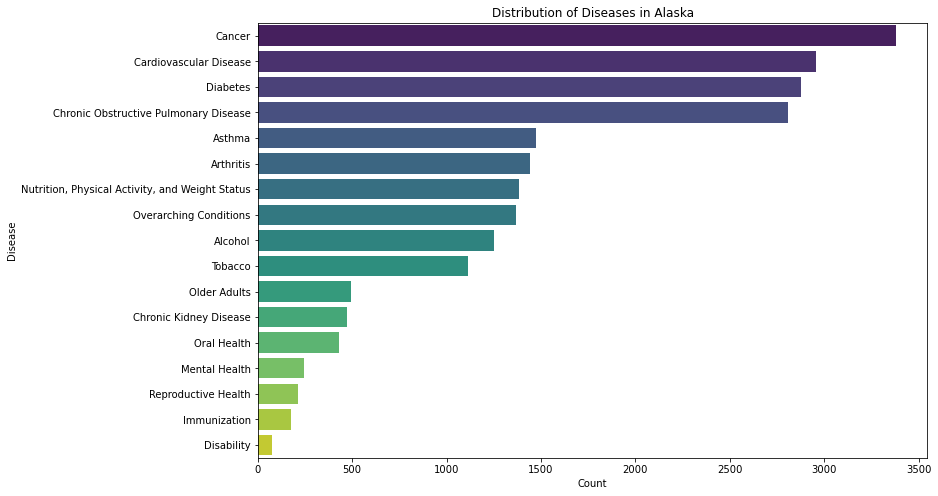

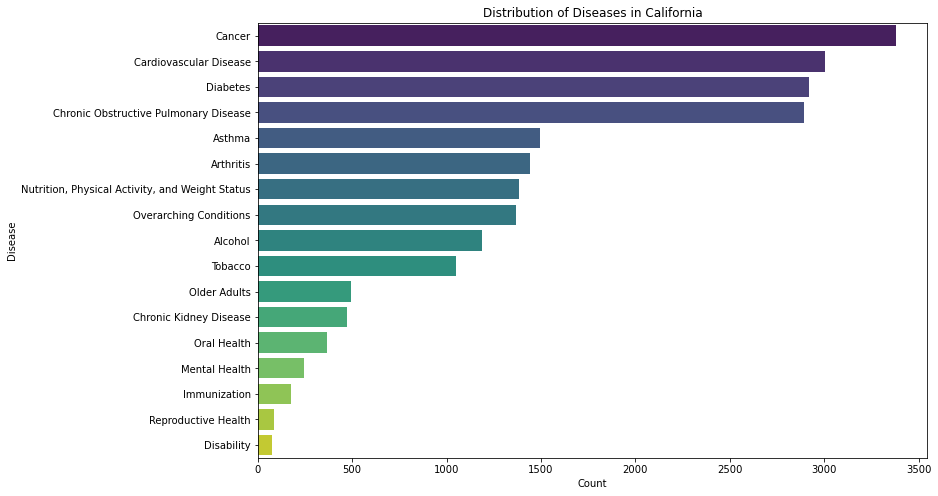

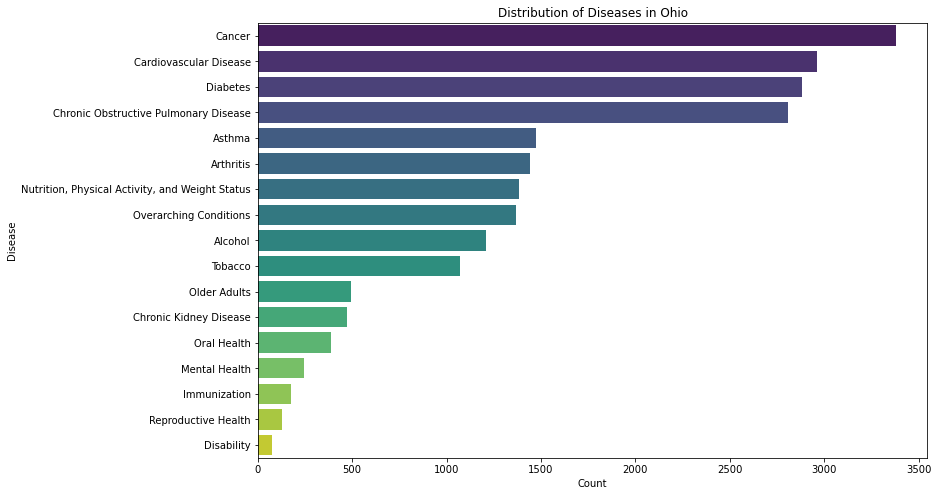

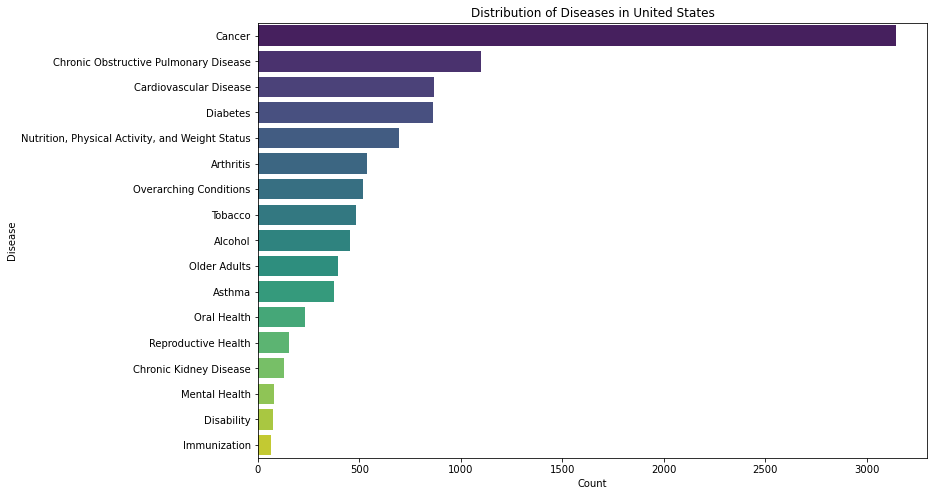

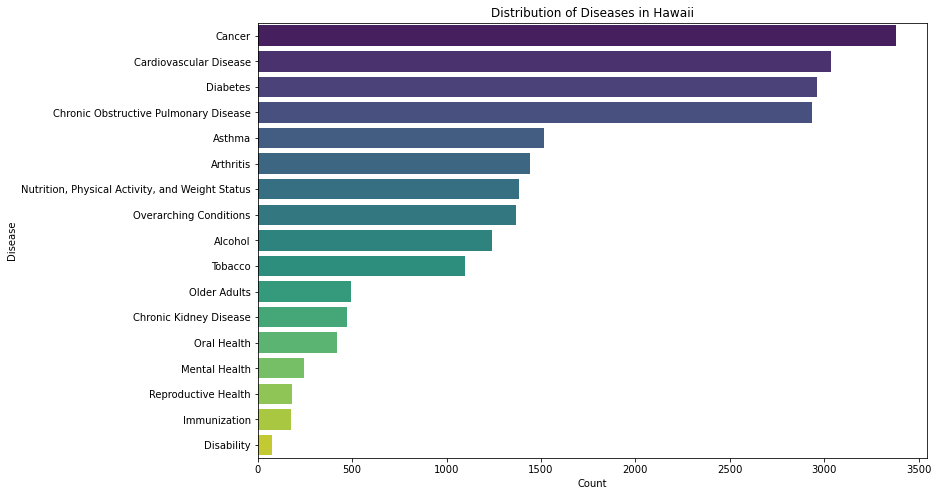

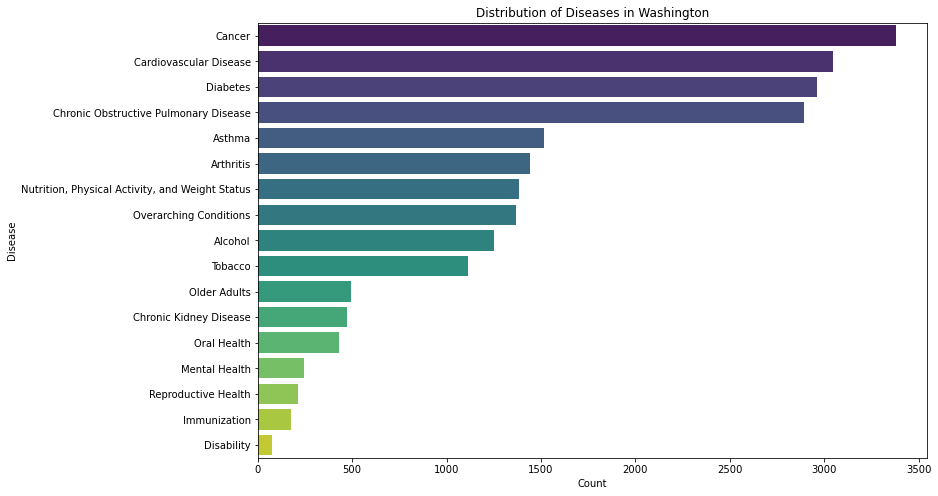

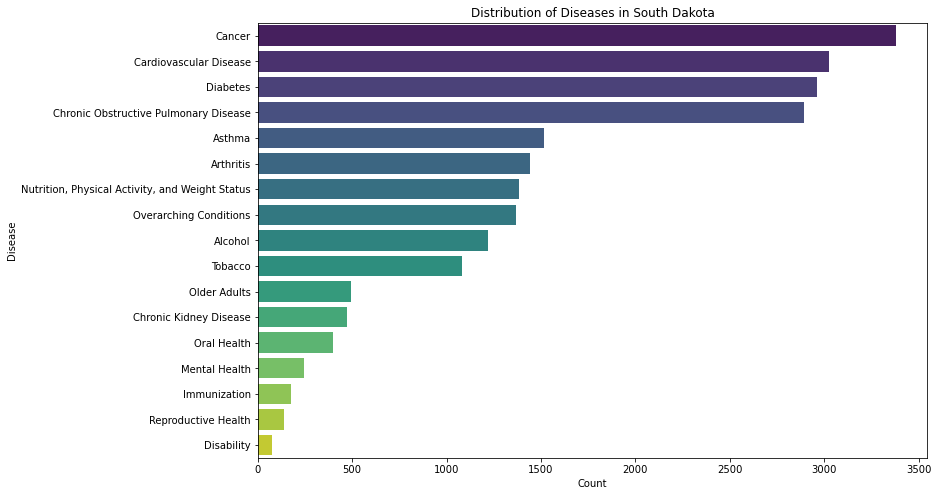

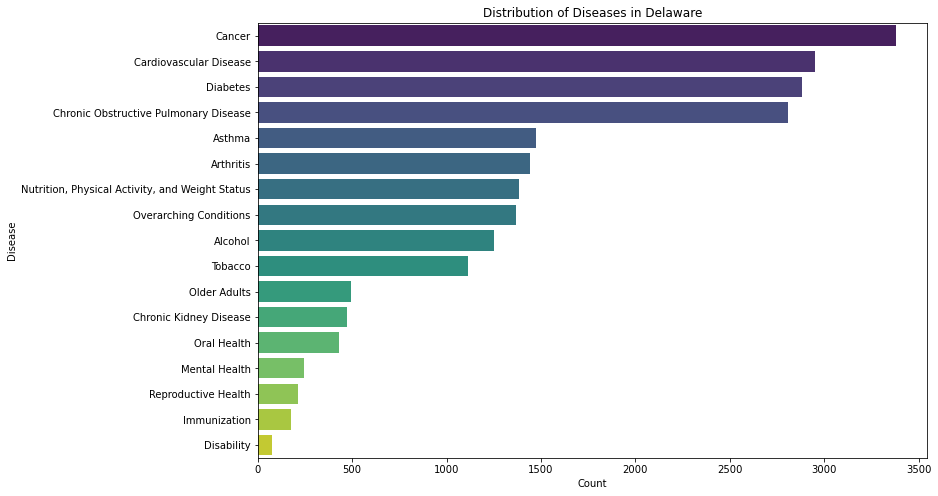

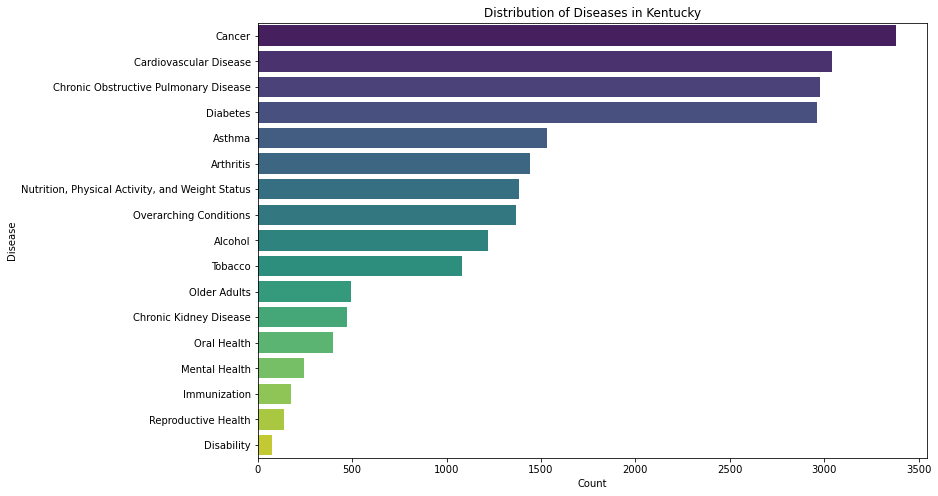

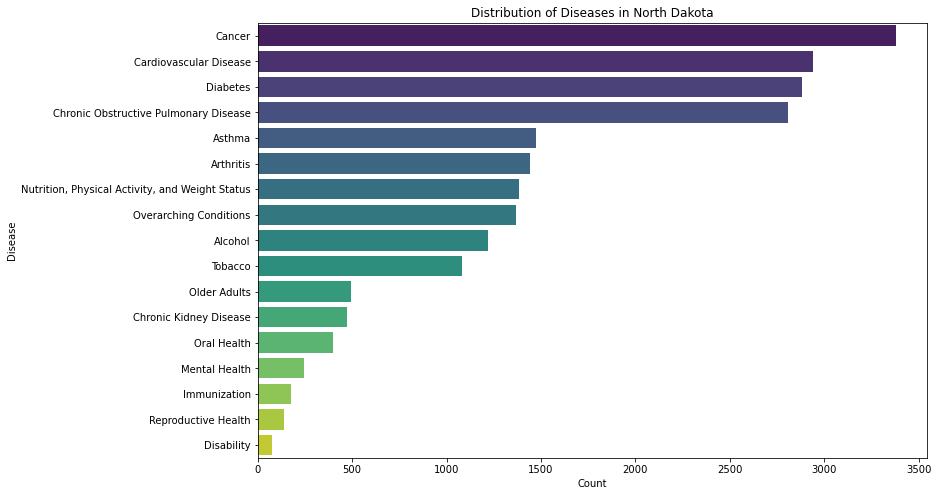

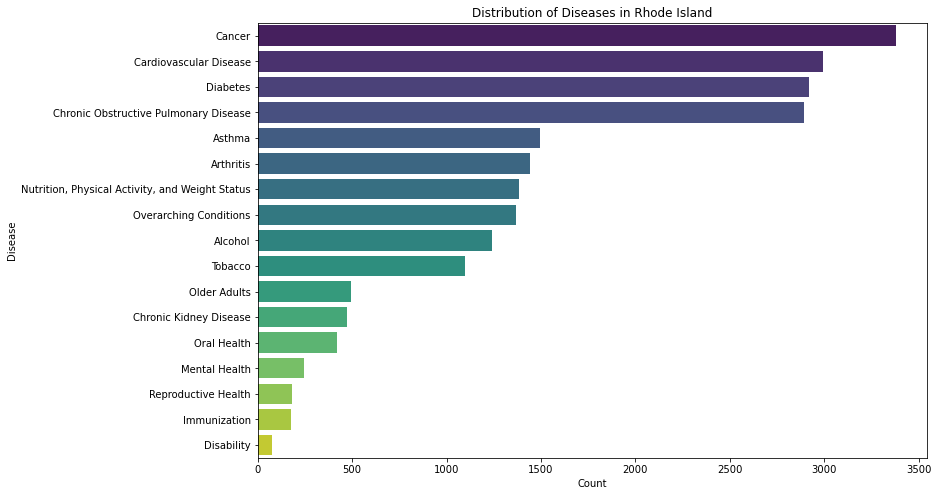

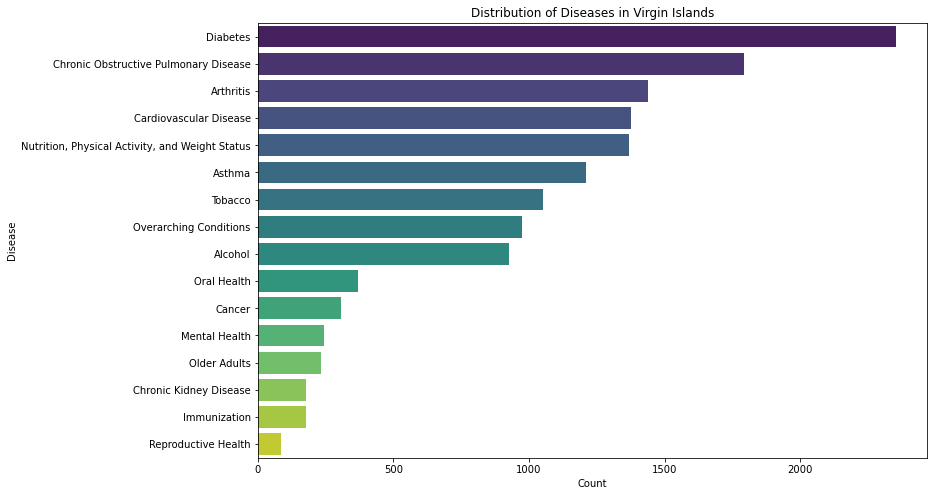

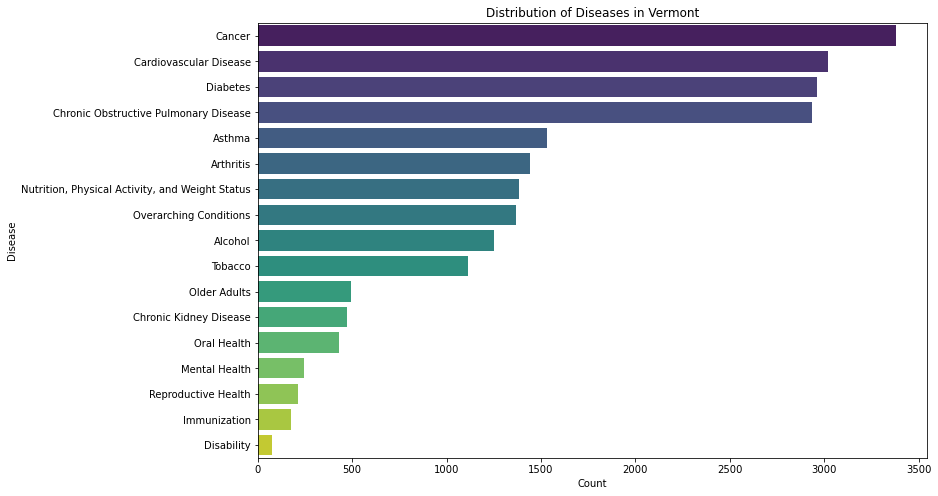

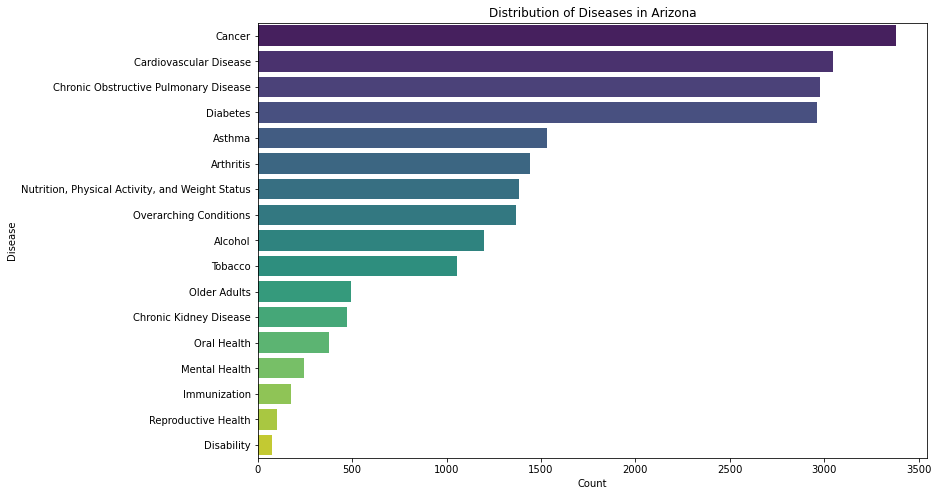

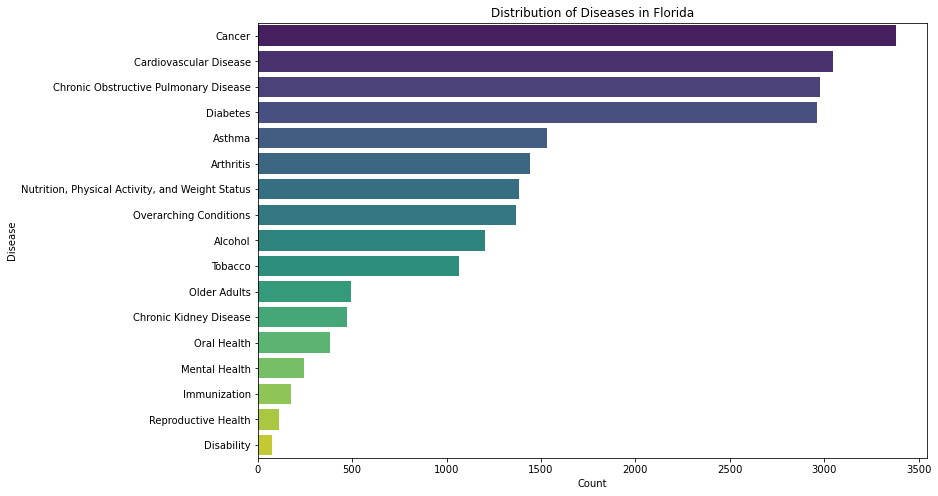

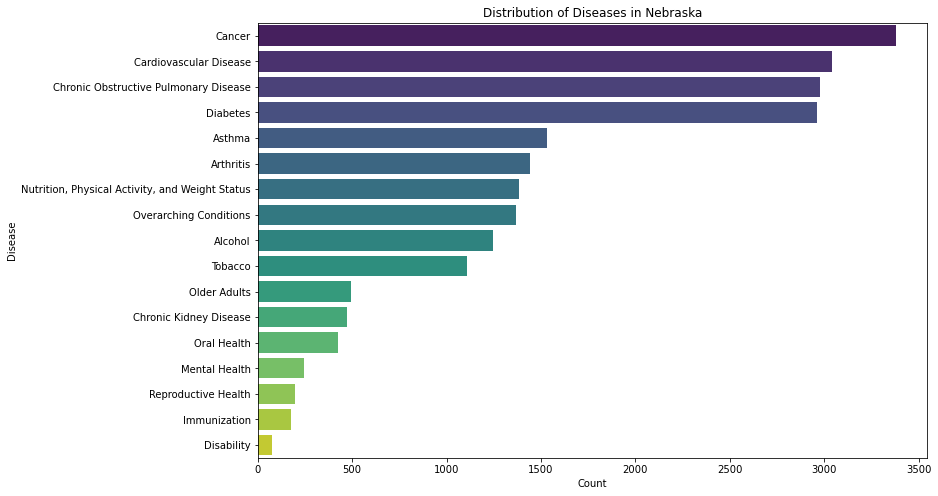

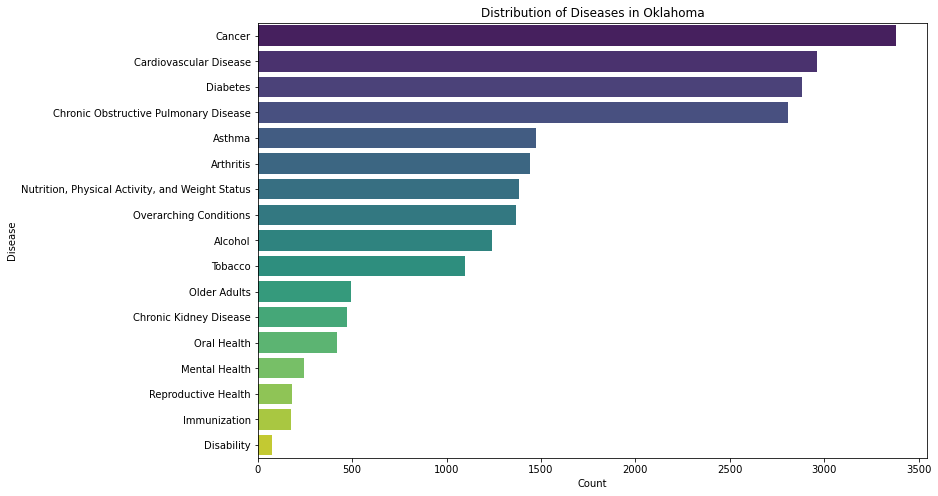

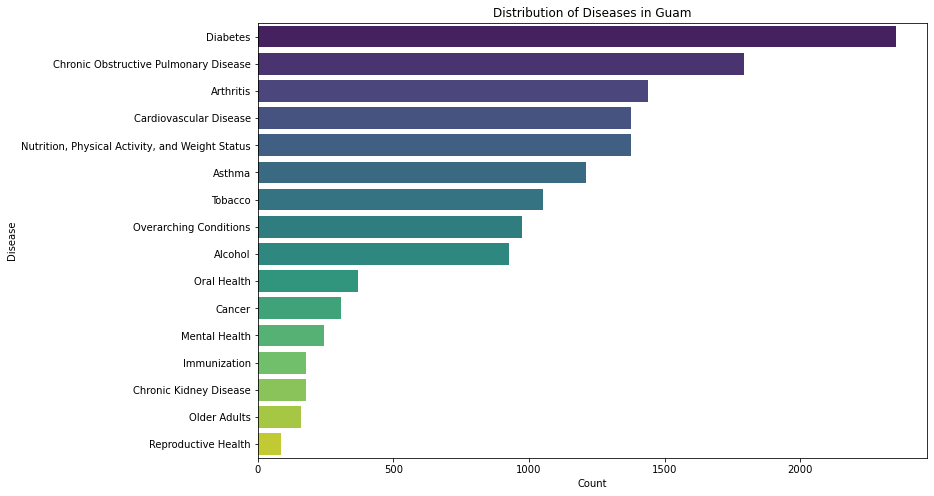

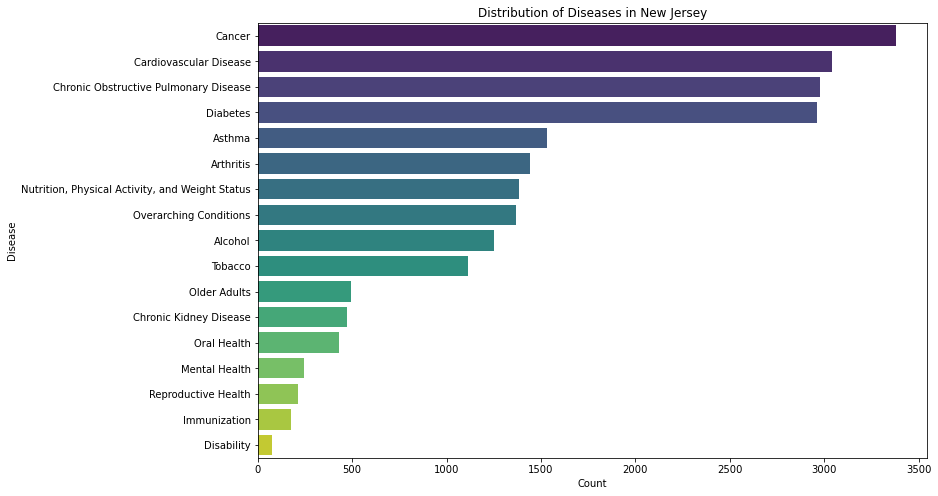

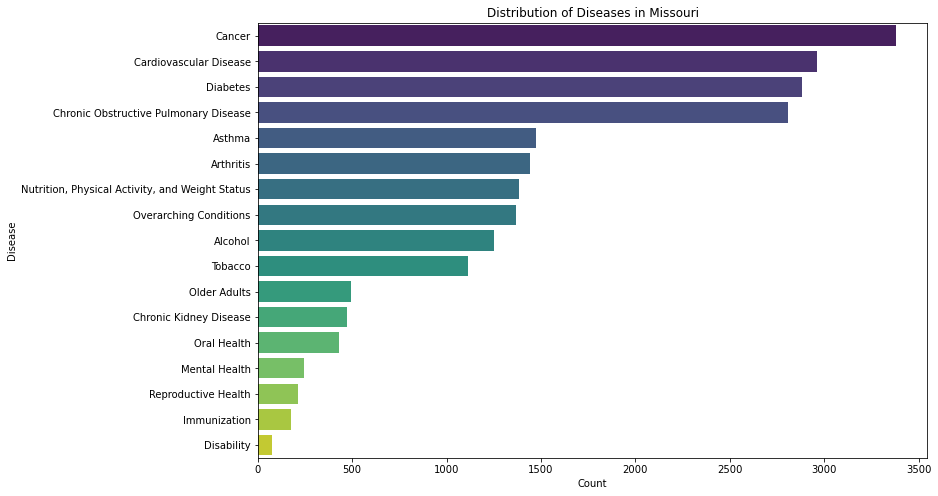

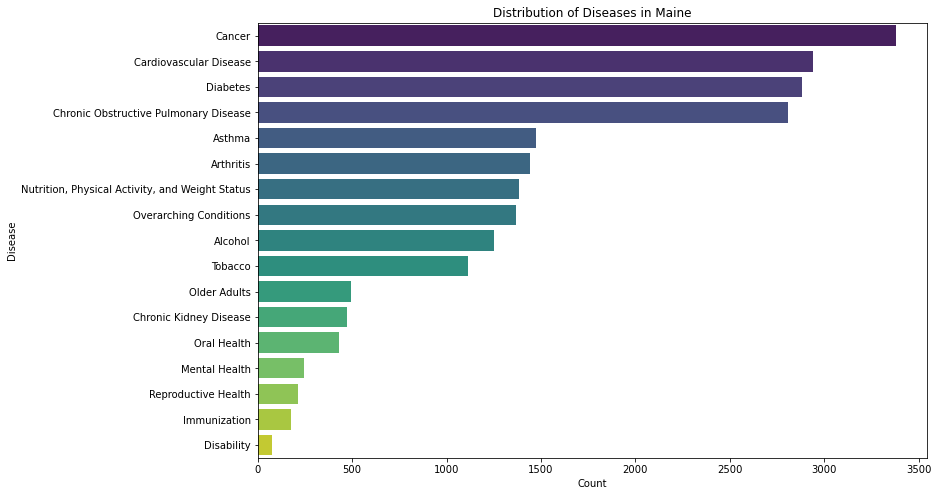

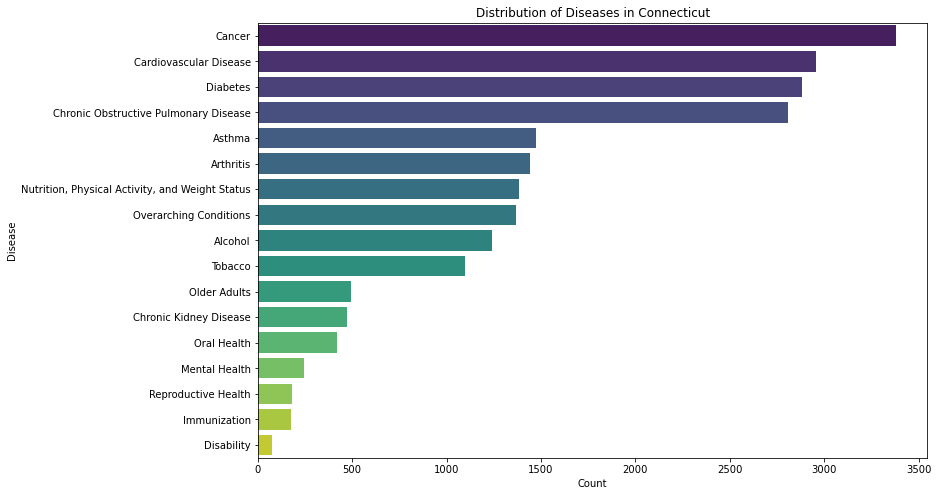

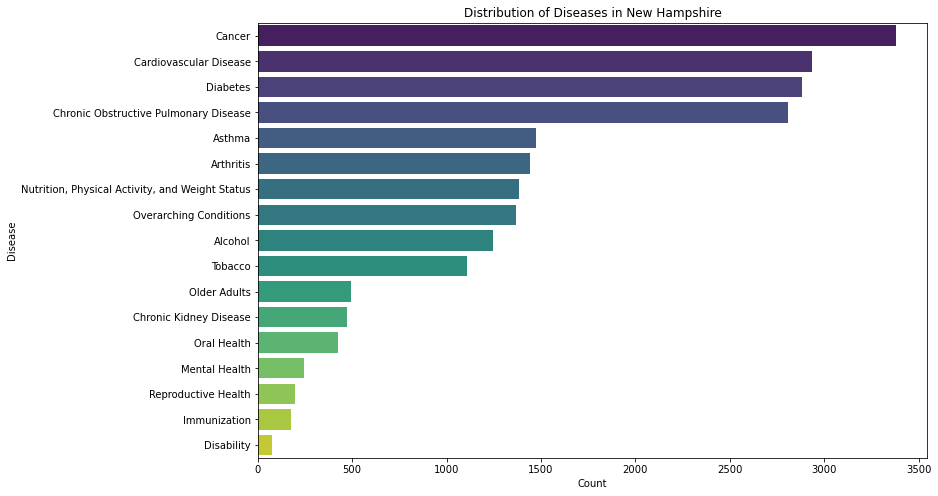

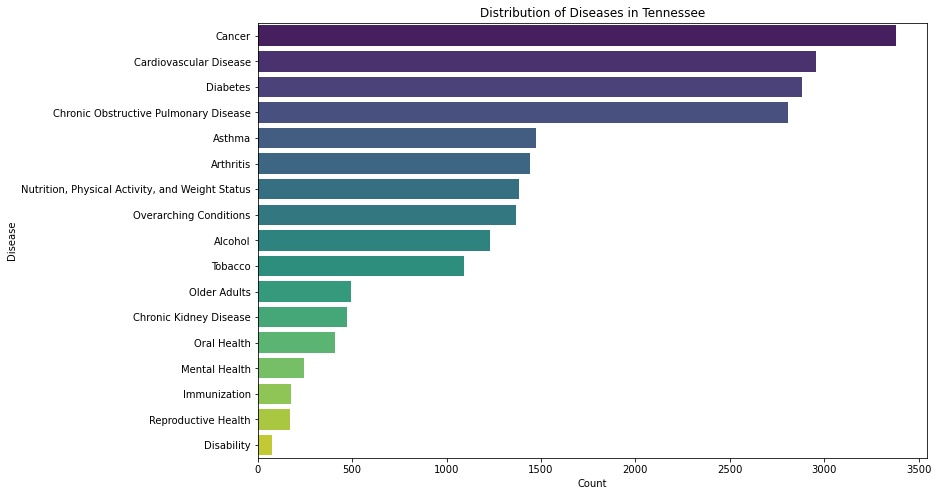

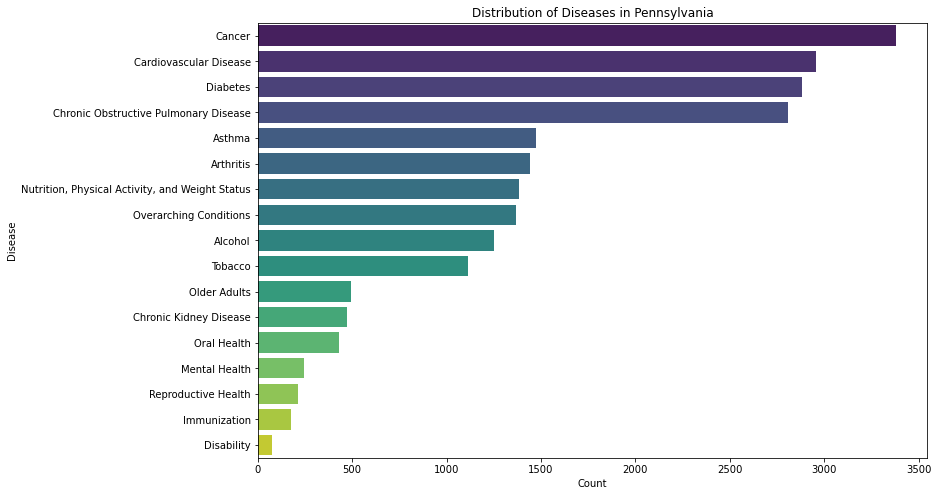

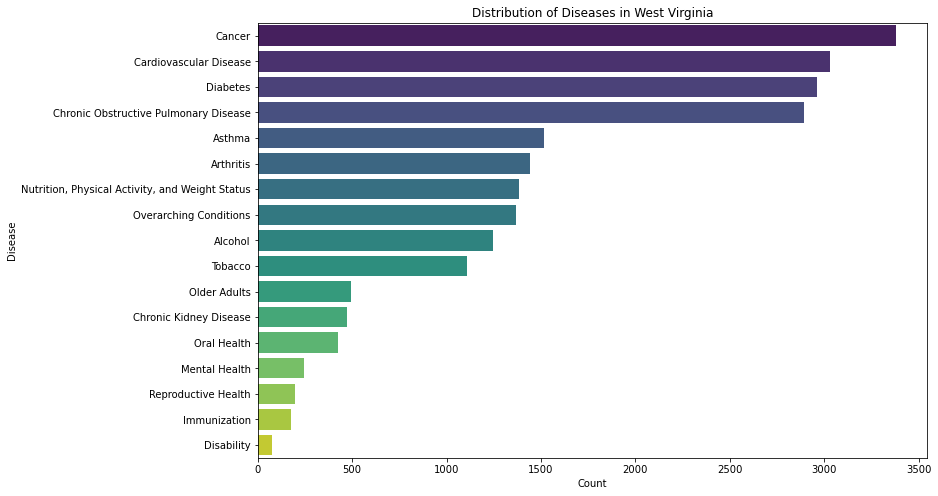

In [19]:

# Get unique states
states = data['LocationDesc'].unique()

# Plot disease distribution for each state
for state in states:
    # Filter data for the current state
    state_data = data[data['LocationDesc'] == state]
    
    # Count occurrences of each disease (Topic) in the current state
    disease_counts_state = state_data['Topic'].value_counts()
    
    # Plot disease distribution for the current state
    plt.figure(figsize=(12, 8))
    sns.barplot(x=disease_counts_state.values, y=disease_counts_state.index, palette='viridis')
    plt.title(f'Distribution of Diseases in {state}')
    plt.xlabel('Count')
    plt.ylabel('Disease')
    plt.show()


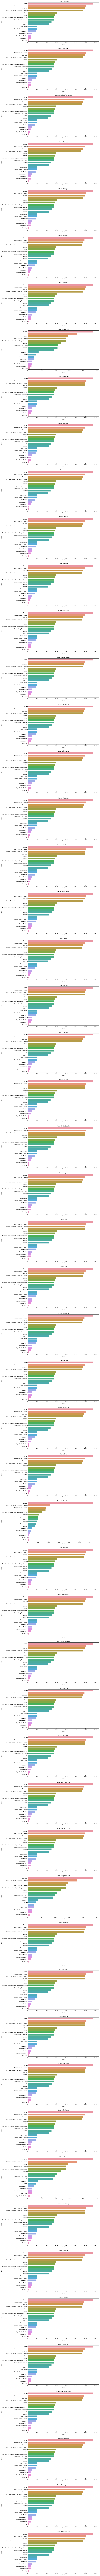

In [20]:
# Extract states
states_data = data['LocationDesc'].unique()

# Create subplots for each state
fig, axes = plt.subplots(nrows=len(states_data ), ncols=1, figsize=(12, 8*len(states_data )))

# Iterate through each topic and create a bar plot
for i, state in enumerate(states_data):
    ax = axes[i]
    state_data = data[data['LocationDesc'] == state]
    state_topic_counts = state_data['Topic'].value_counts()
    sns.barplot(x=state_topic_counts.values, y=state_topic_counts.index, ax=ax)
    ax.set_title(f'State: {state}')
    ax.set_xlabel('Count')
    ax.set_ylabel('Topic')
    ax.set_xlim(0, max(state_topic_counts.values)*1.1)


### Study period
Lets take a look at te study period of each topic as provided by YearStart and YearEnd

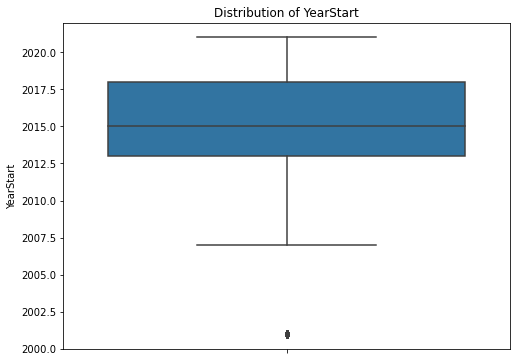

In [21]:
# Boxplot of 'YearStart'
plt.figure(figsize=(8, 6))
sns.boxplot(y='YearStart', data=data)
plt.title('Distribution of YearStart')
plt.show()

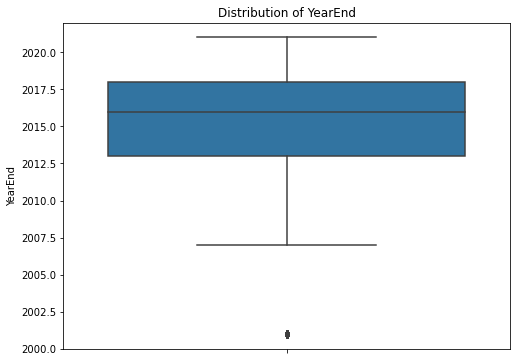

In [22]:
# Boxplot of 'YearEnd'
plt.figure(figsize=(8, 6))
sns.boxplot(y='YearEnd', data=data)
plt.title('Distribution of YearEnd')
plt.show()

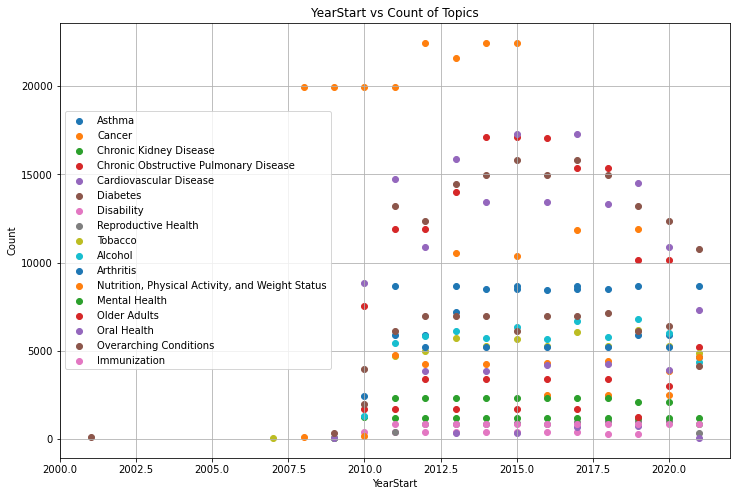

In [23]:
# Count occurrences of each topic by YearStart
unique_topics = data['Topic'].unique()
topic_year_counts = data.groupby(['Topic', 'YearStart']).size().reset_index(name='Count')

# Create a scatter plot for each topic
plt.figure(figsize=(12, 8))
for topic in unique_topics:
    topic_data = topic_year_counts[topic_year_counts['Topic'] == topic]
    plt.scatter(topic_data['YearStart'], topic_data['Count'], label=topic)

plt.title('YearStart vs Count of Topics')
plt.xlabel('YearStart')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()


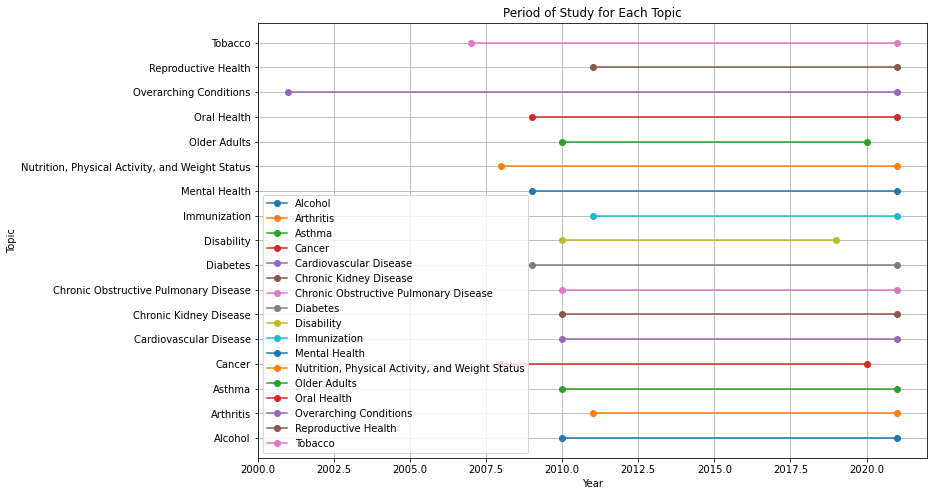

In [24]:
# Group data by Topic and calculate the minimum and maximum YearStart and YearEnd for each topic
topic_periods = data.groupby('Topic').agg({'YearStart': 'min', 'YearEnd': 'max'}).reset_index()

# Plot period of study for each topic
plt.figure(figsize=(12, 8))
for i, row in topic_periods.iterrows():
    plt.plot([row['YearStart'], row['YearEnd']], [i, i], marker='o', label=row['Topic'])

plt.yticks(range(len(topic_periods)), topic_periods['Topic'])
plt.xlabel('Year')
plt.ylabel('Topic')
plt.title('Period of Study for Each Topic')
plt.legend()
plt.grid(True)
plt.show()


Overaching conditions had the longest study period  while reproductive health and disability ha the shortes period which might explain their low distribution among states

### Data Sources

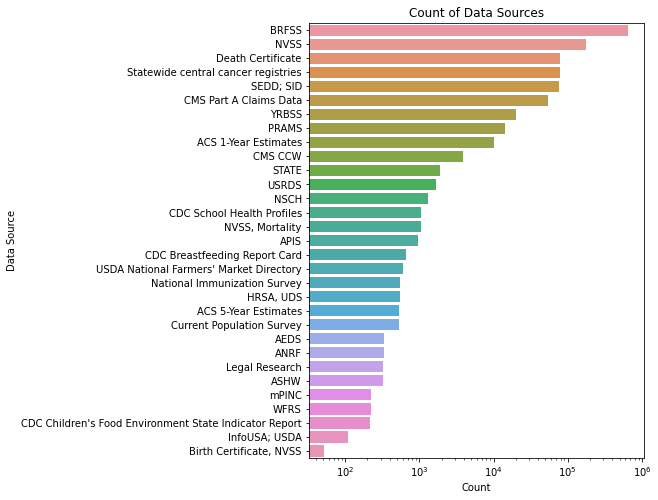

In [25]:
# Count occurrences of each data source
data_source_counts = data['DataSource'].value_counts()

# Plot count of data sources
plt.figure(figsize=(6, 8))
sns.barplot(x=data_source_counts.values, y=data_source_counts.index)
plt.xscale('log')  # Using logarithmic scale for x-axis
plt.title('Count of Data Sources')
plt.xlabel('Count')
plt.ylabel('Data Source')
plt.show()

BRFSS was the leading datasouce for the dataset followed by NVSS while Birth certificate,NVSS and InfoUSA came last

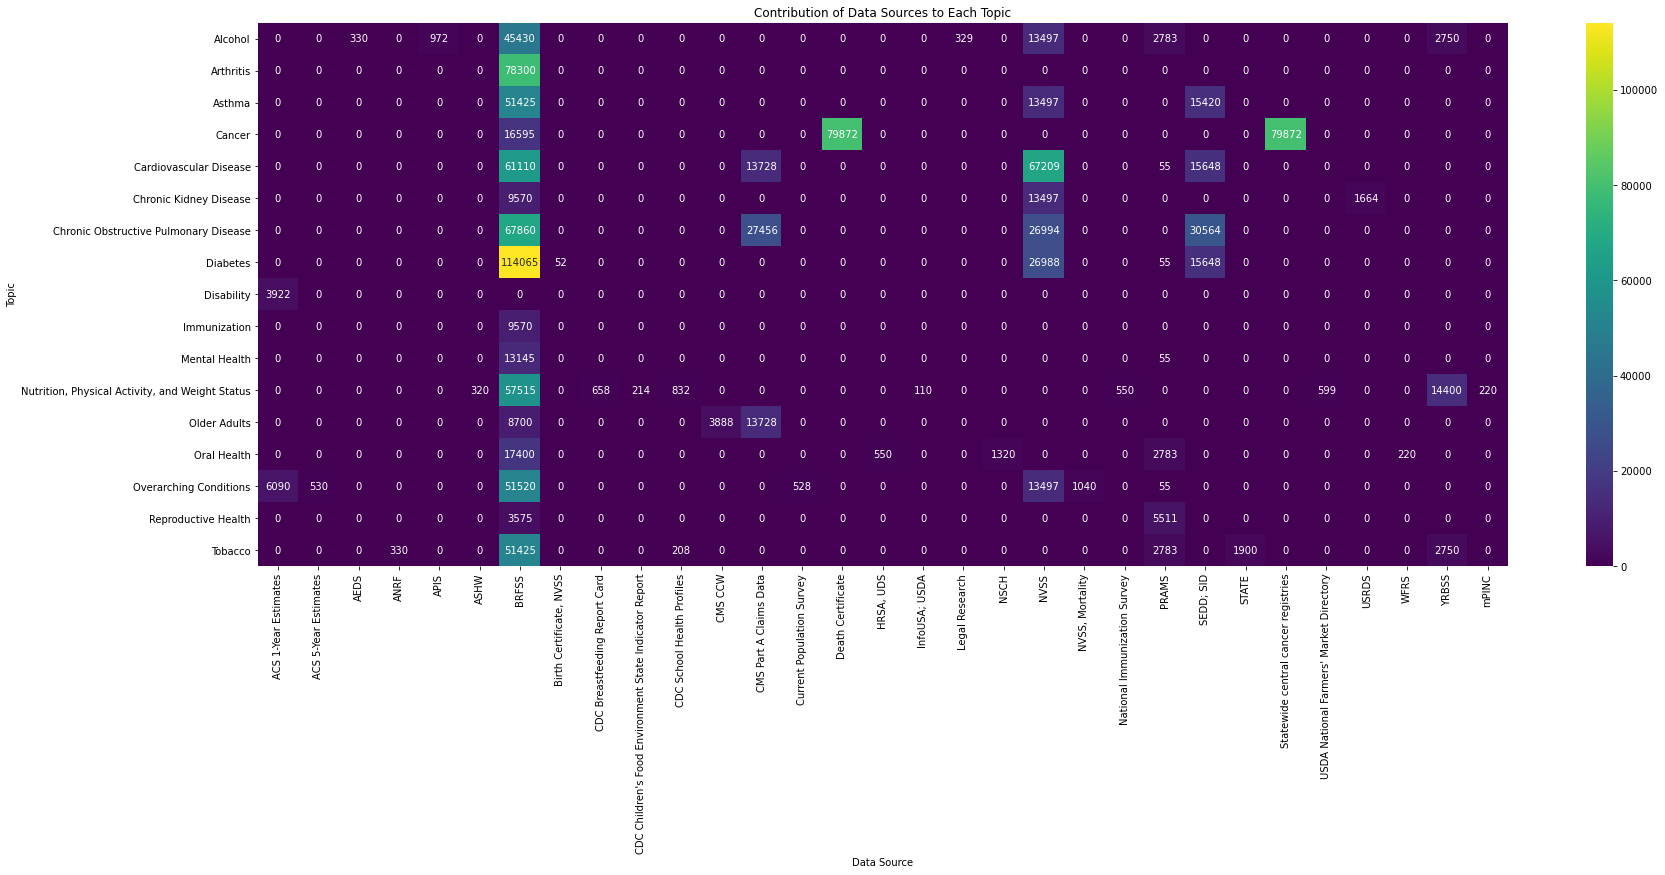

In [26]:
# Create a pivot table to count occurrences of each combination of Topic and DataSource
topic_data_source_counts = data.pivot_table(index='Topic', columns='DataSource', aggfunc='size', fill_value=0)

# Plot heatmap
plt.figure(figsize=(28, 10))
sns.heatmap(topic_data_source_counts, cmap='viridis', annot=True, fmt='d')
plt.title('Contribution of Data Sources to Each Topic')
plt.xlabel('Data Source')
plt.ylabel('Topic')
plt.show()


The hatmap shows how each data source contributed to the topics:
1. From the heatmap we can see that the largest data contributor to cancer as a topic was Death certificates and the Statewide central cancer registry.
2. Diabetes got most of its data from BRFSS
3. BRFSS contributed t almost all topics except Disability which got its data from ACS 1-year Estimates.

### Questions

In [27]:
# Count occurrences of each question
question_counts = data['Question'].value_counts()

# Print the five most common questions
print("Five most common questions asked:")
question_counts.head()


Five most common questions asked:


Question
Hospitalization for heart failure among Medicare-eligible persons aged >= 65 years                                                      13728
Hospitalization for chronic obstructive pulmonary disease as any diagnosis among Medicare-eligible persons aged >= 65 years             13728
Hospitalization for chronic obstructive pulmonary disease as first-listed diagnosis among Medicare-eligible persons aged >= 65 years    13728
Hospitalization for hip fracture among Medicare-eligible persons aged >= 65 years                                                       13728
Asthma mortality rate                                                                                                                   13497
Name: count, dtype: int64

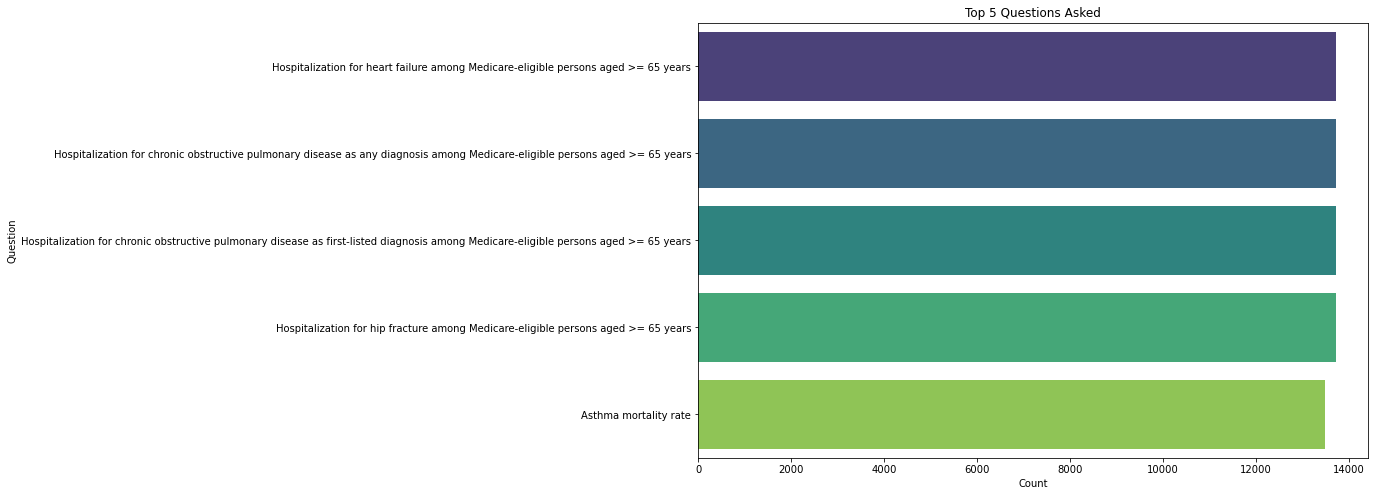

In [28]:
# Select the top 5 questions
top_questions = question_counts.head(5)

# Plot top 5 questions
plt.figure(figsize=(12, 8))
sns.barplot(x=top_questions.values, y=top_questions.index, palette='viridis')
plt.title('Top 5 Questions Asked')
plt.xlabel('Count')
plt.ylabel('Question')
plt.show()



### Stratification
stratification refers to the process of dividing a population into homogeneous subgroups or strata based on certain characteristics like age, gender, race, or any other categorical variable of interest.
This helps in analyzing data more effectively by considering the variation within each subgroup separately, which can reveal insights that might be masked when analyzing the entire population as a whole.

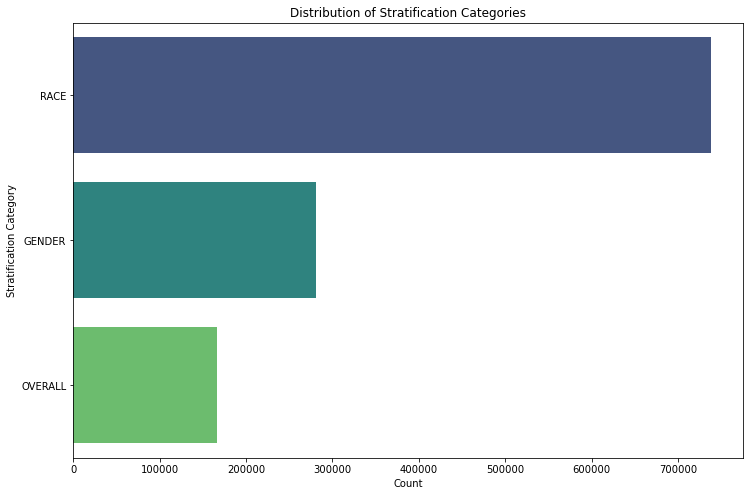

In [29]:
# Count occurrences of each stratification category
stratification_counts = data['StratificationCategoryID1'].value_counts()

# Plot stratification category distribution
plt.figure(figsize=(12, 8))
sns.barplot(x=stratification_counts.values, y=stratification_counts.index, palette='viridis')
plt.title('Distribution of Stratification Categories')
plt.xlabel('Count')
plt.ylabel('Stratification Category')
plt.show()


<ipython-input-30-9f2e1ffcf884>:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


<Figure size 864x576 with 0 Axes>

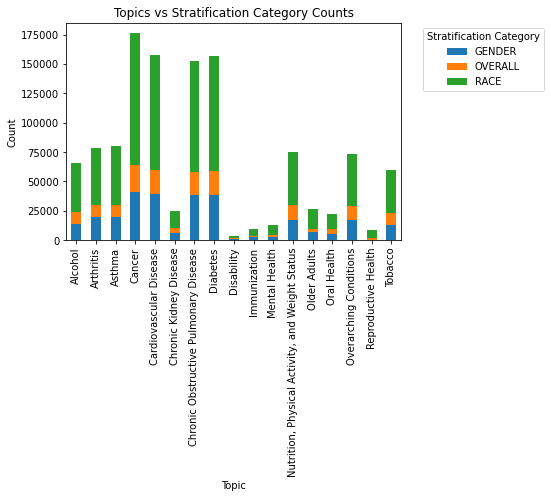

In [30]:

# Group data by Topic and StratificationCategoryID1 and count occurrences
topic_stratification_counts = data.groupby(['Topic', 'StratificationCategoryID1']).size().unstack(fill_value=0)

# Plot stacked bar chart
plt.figure(figsize=(12, 8))
topic_stratification_counts.plot(kind='bar', stacked=True)
plt.title('Topics vs Stratification Category Counts')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Stratification Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [31]:
# Check different stratification categories and their relation to 'StratificationID' column
stratification_counts = data.groupby(['StratificationCategoryID1', 'StratificationID1']).size()

# Print the result
print(stratification_counts)


StratificationCategoryID1  StratificationID1
GENDER                     GENF                 140479
                           GENM                 140477
OVERALL                    OVR                  166332
RACE                       AIAN                  43182
                           AIAO                  19968
                           API                   40094
                           APIO                  19968
                           ASN                    3267
                           BLK                  146984
                           HIS                  147199
                           MRC                   85241
                           OTH                   85241
                           WHT                  147244
dtype: int64


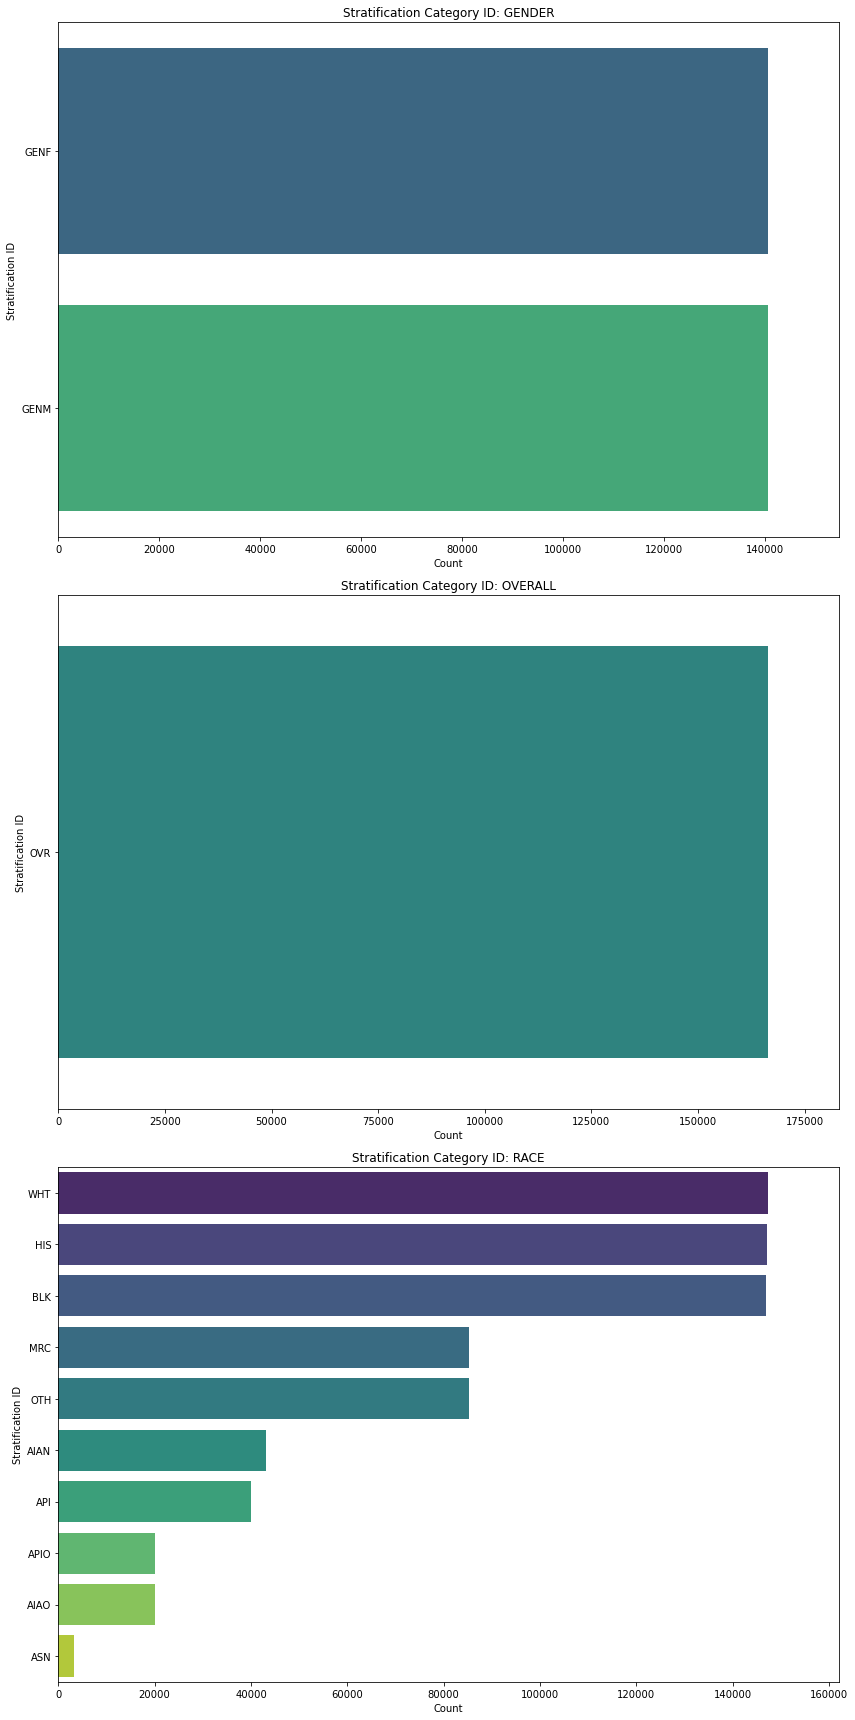

In [32]:
# Get unique stratification category IDs
stratification_category_ids = data['StratificationCategoryID1'].unique()

# Create subplots for each stratification category ID
fig, axes = plt.subplots(len(stratification_category_ids), 1, figsize=(12, 8 * len(stratification_category_ids)))

# Iterate over each stratification category ID
for i, strat_cat_id in enumerate(stratification_category_ids):
    # Filter data for the current stratification category ID
    strat_data = data[data['StratificationCategoryID1'] == strat_cat_id]
    
    # Group data by StratificationID1 and count occurrences
    stratification_counts = strat_data['StratificationID1'].value_counts()
    
    # Plot bar plot
    sns.barplot(x=stratification_counts.values, y=stratification_counts.index, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Stratification Category ID: {strat_cat_id}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel('Stratification ID')
    axes[i].set_xlim(0, max(stratification_counts.values) * 1.1)

# Adjust layout and show plots
plt.tight_layout()
plt.show()
